# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

Loading the data set

In [2]:
hotel_data = pd.read_csv('INNHotelsGroup (1).csv') 

## Data Overview

- Observations
- Sanity checks

__a. Viewing the first and last few rows of the dataset__

In [3]:
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [4]:
hotel_data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


_Observation:_ The data contains categoric, int and float data.

__b. Checking the shape of the data__

In [5]:
hotel_data.shape

(36275, 19)

_Observation_  There are 36275 rows and columns

In [6]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

_Observation:_

* There are 1 float column, 13 int columns and 5 categoric or object variables  
* The data only uses 5.3+ MB of memory which is small  
* Non of the columns contain null values as evidenced by the total non null count  

__c. Getting the statistical summary of the variables__

In [7]:
hotel_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


_Statistical Observations_
* Booking_ID column is a unique identifier column having 36275 unique counts 
* There are 4 meal plan types (Meal Plan 1 most popular), 7 room types (Room Type 1 most popular), 5 market segment types (Online most frequent)
* The target column Booking_Status is categoric with most of the bookings not_cancelled
* 50% of the guests comprise of 2 adults and no children
* 75% of the number of children is 0 with maximum of 10. There could be an anomally here
* The required parking space does not exceed 1
* Lead time from booking spans from 0days all the way to 443 days that is more than a year
* 75% of the guests are not repeat guests and do not have any past cancelled bookings
* Average price per room spans across $0 all the way to $540 
* 75 % of the guests arrive between the first and 10th month.

__d. Checking for missing values__

In [8]:
hotel_data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

_Observation:_ There are no missing values

__e. Checking for duplicates__

In [9]:
hotel_data.duplicated().sum()

0

_Observation_: There are no duplicates

__f. Dropping the unique column booking_id__

In [10]:
# make a copy of the data before any processing
data = hotel_data.copy()

In [11]:
data = data.drop("Booking_ID", axis=1)

## Exploratory Data Analysis (EDA)

- EDA will now be carried out on the data before building the model with it to investigate and understand it better.
- A few questions have been mentioned below which will guide the EDA
- A thorough analysis of the data, in addition to the questions mentioned below, will be done.
- This will involve Univariate, Bivariate and multivariate analysis

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

helper functions to visualise features

In [12]:
# function to create labeled barplots

def labeled_countplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    
    
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))
    

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,hue=hue,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

In [13]:
# function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

a. Univariate analysis for all numeric features

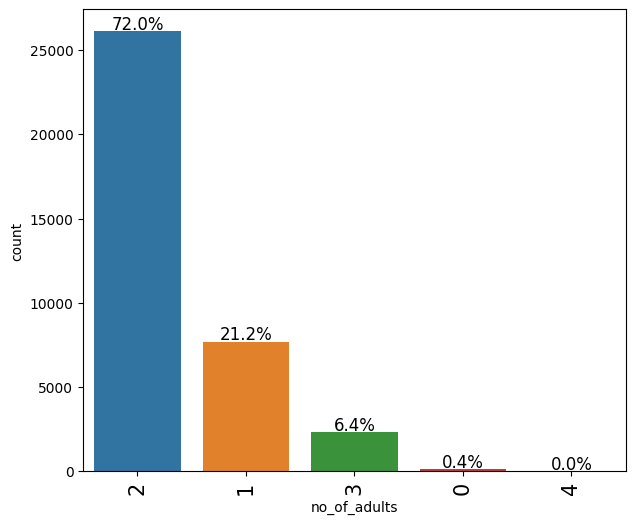

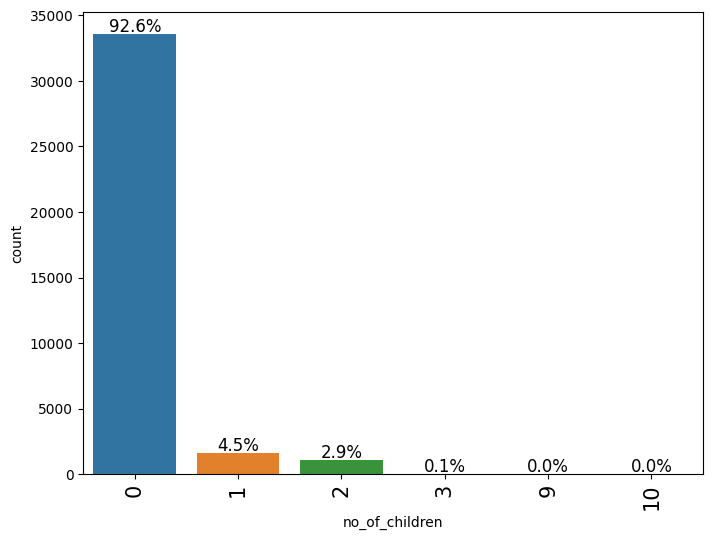

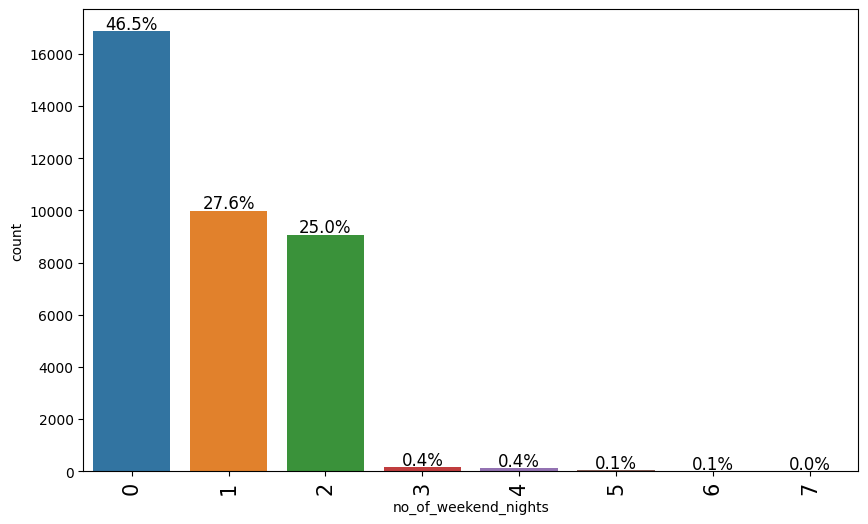

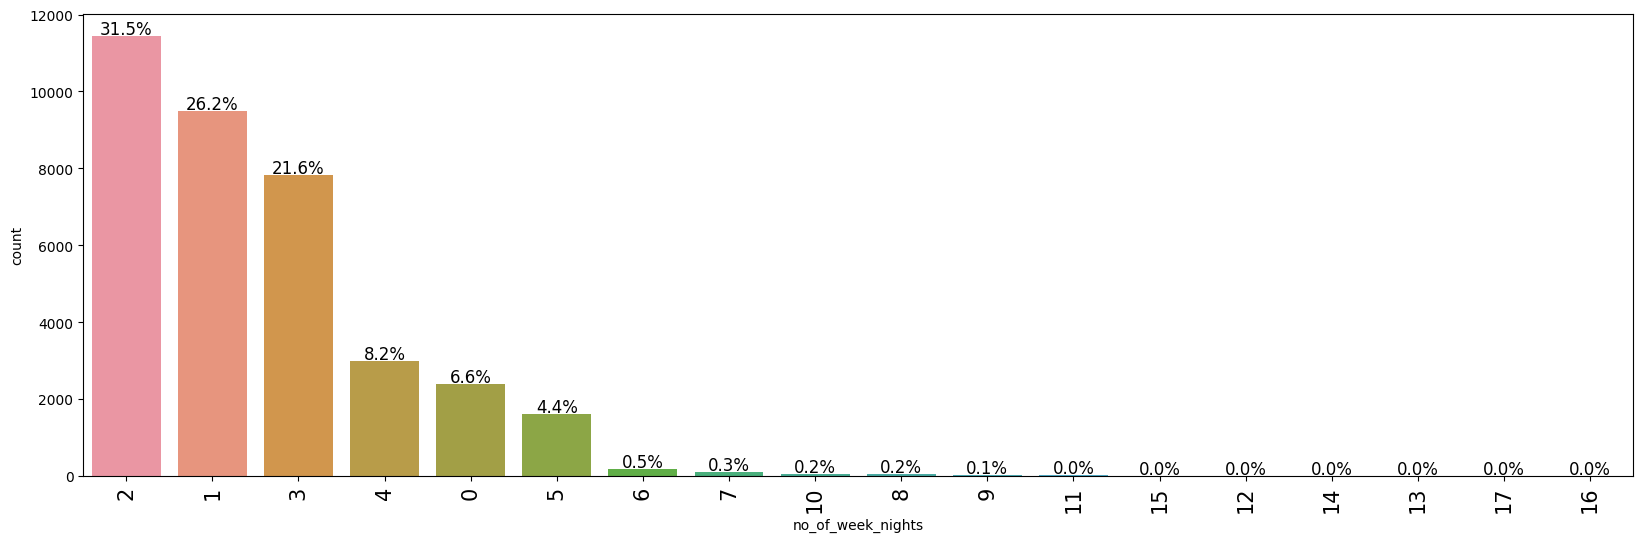

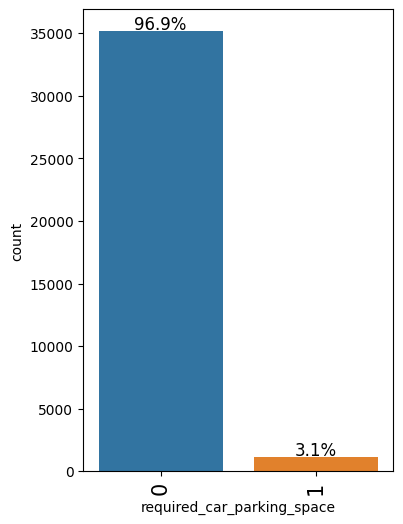

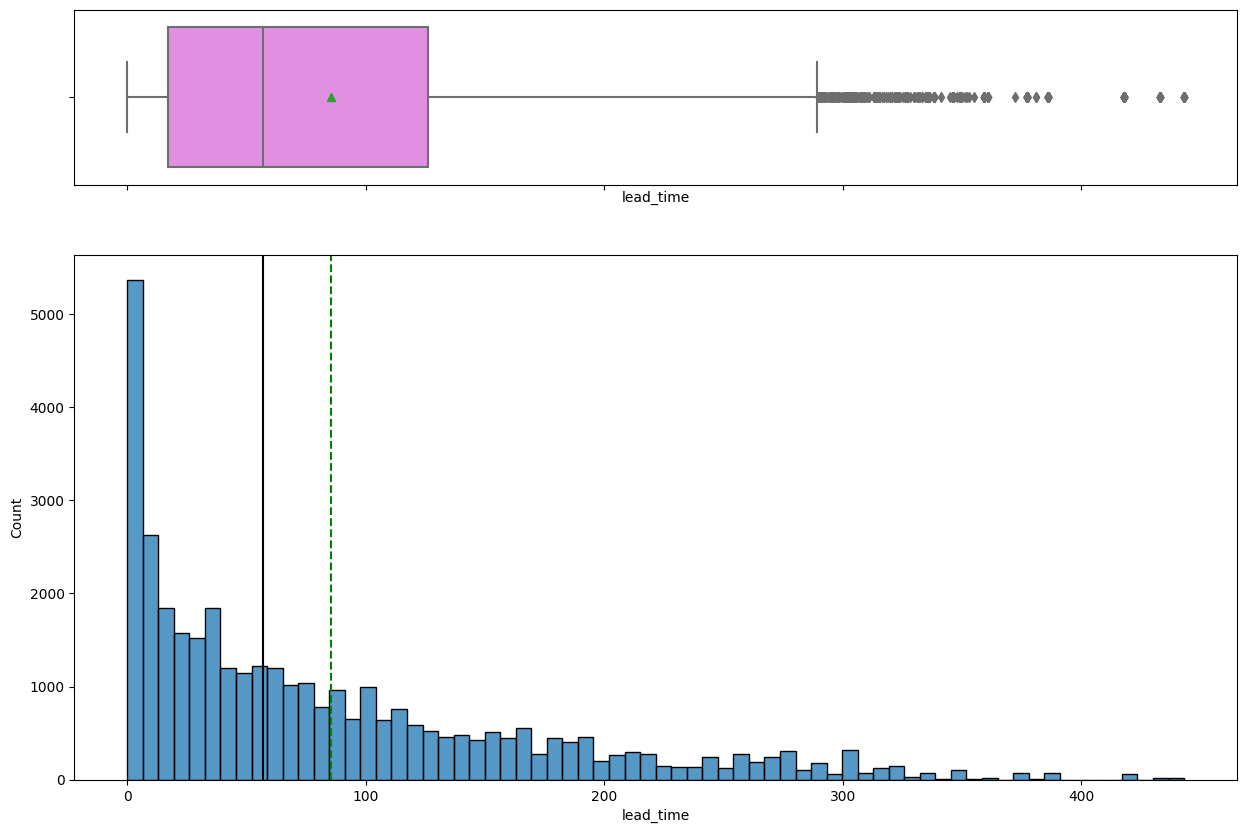

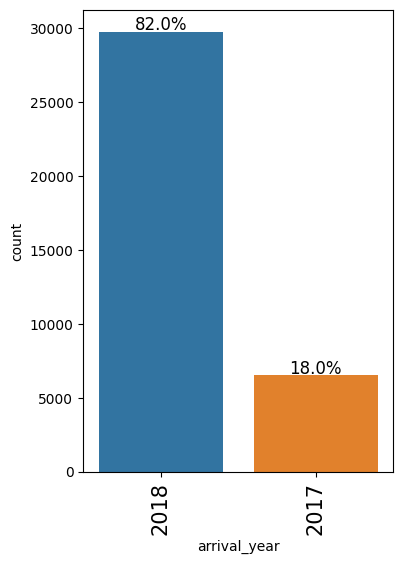

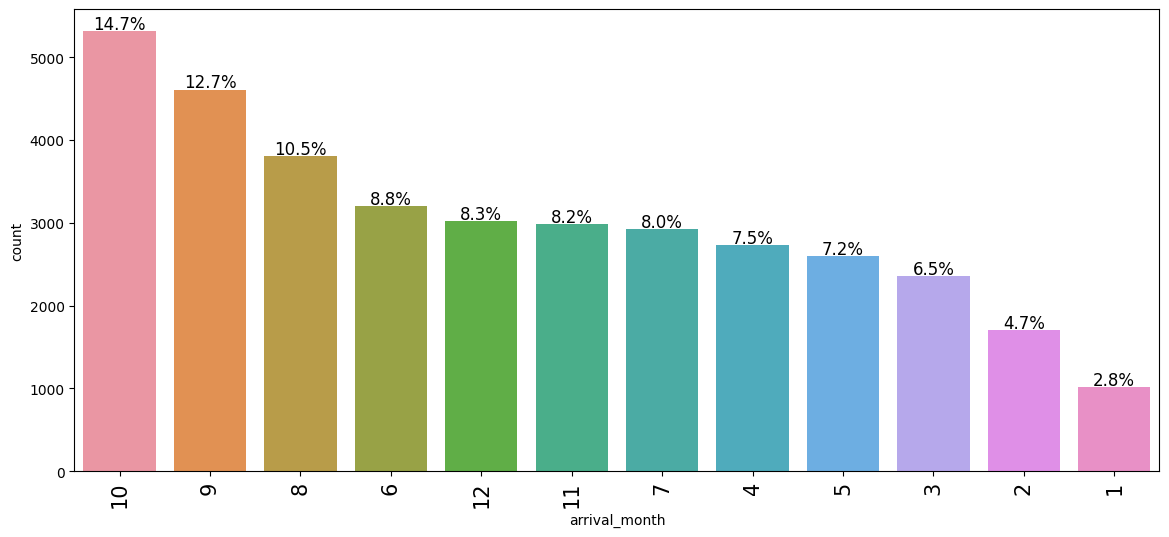

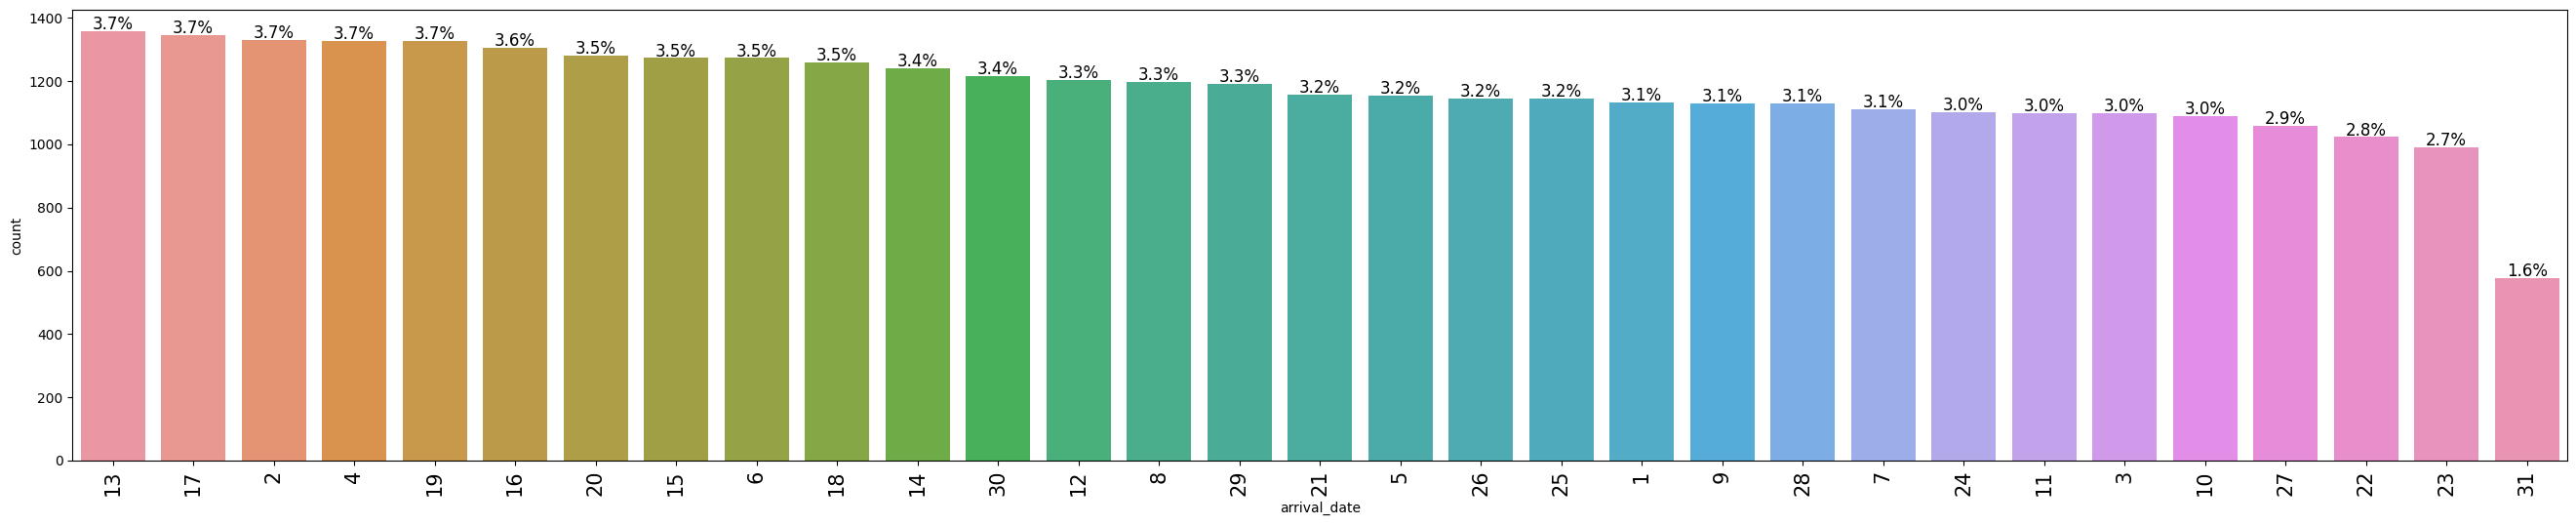

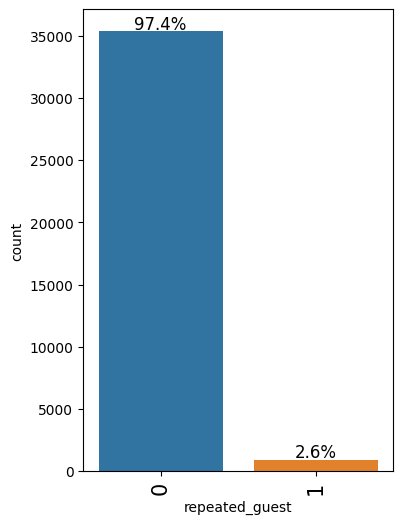

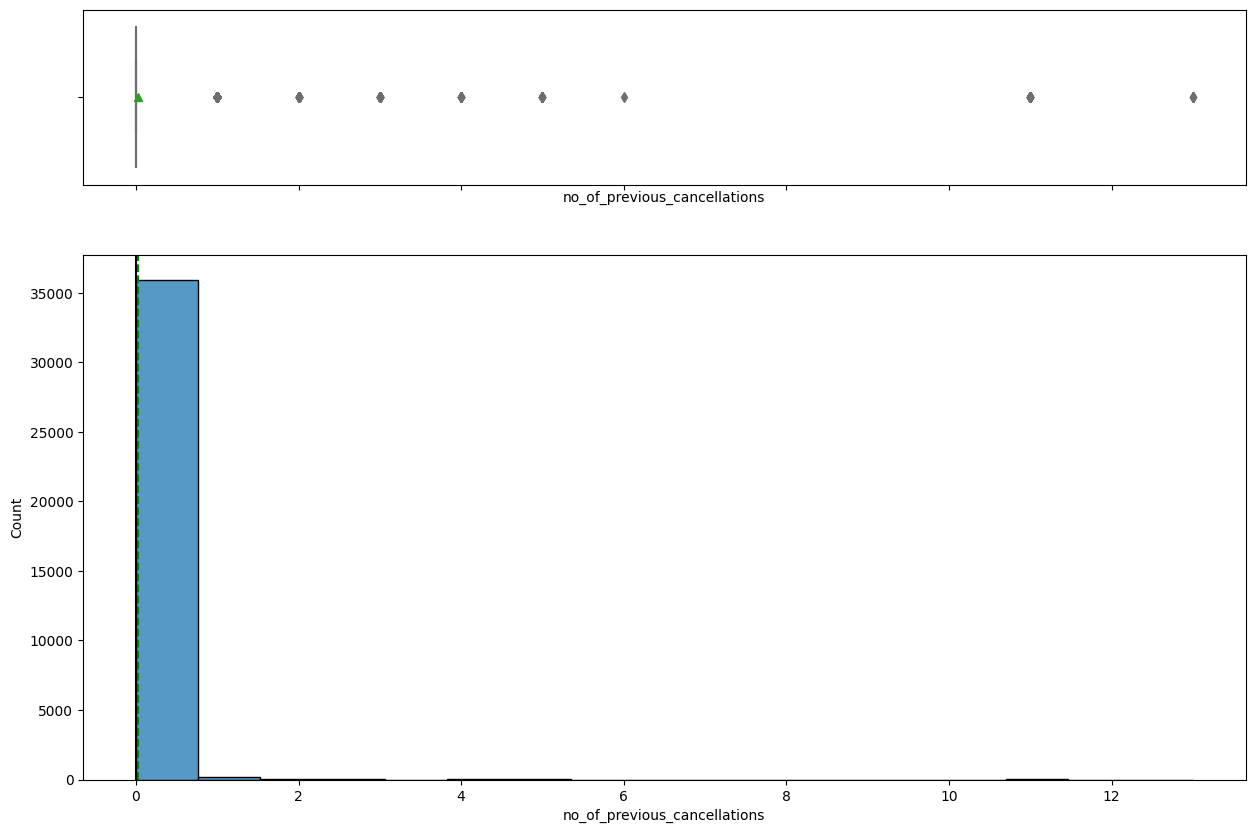

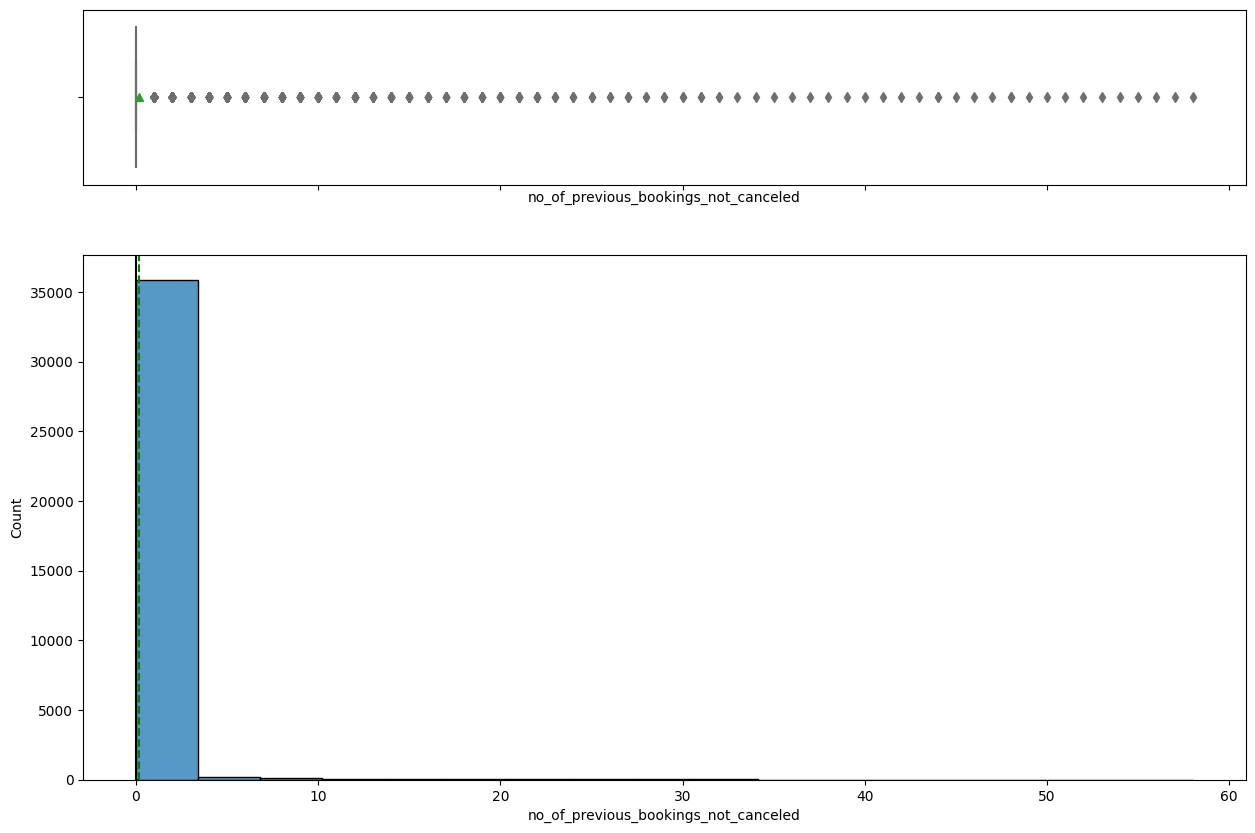

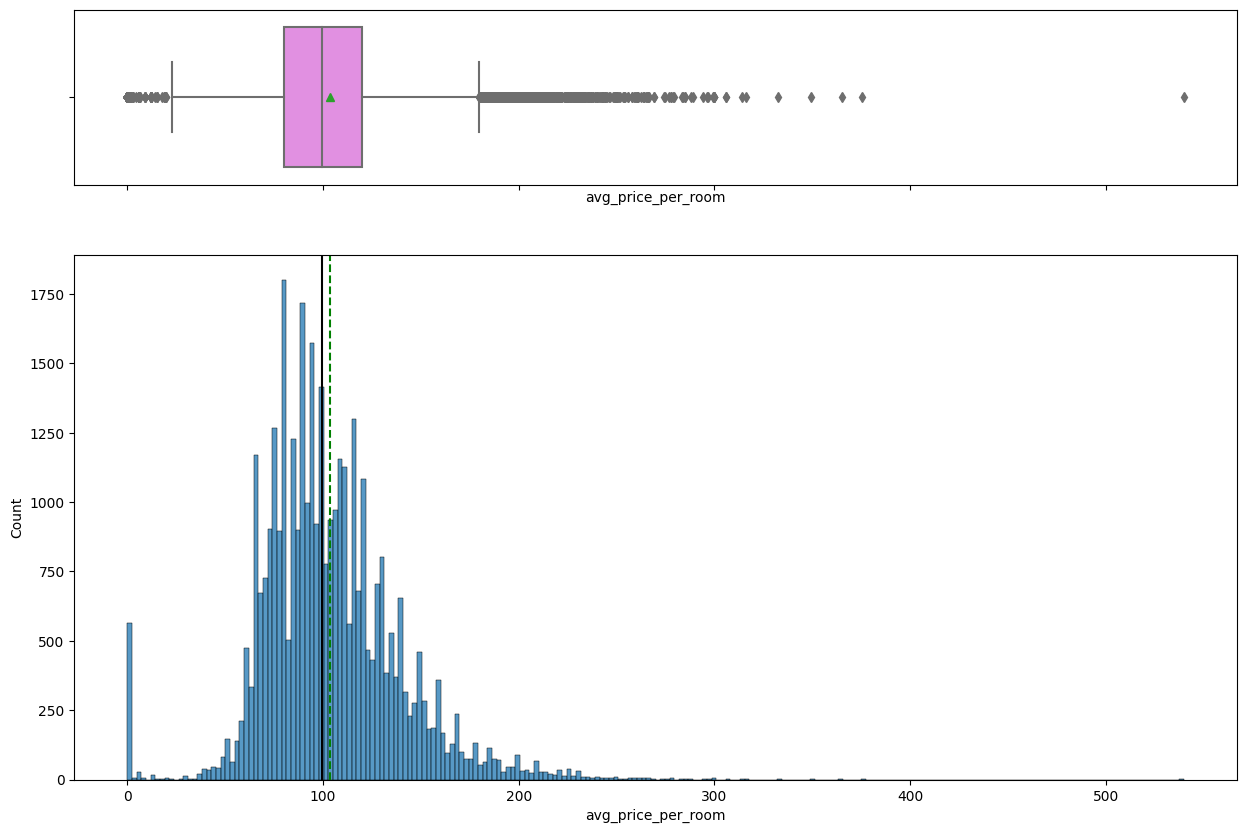

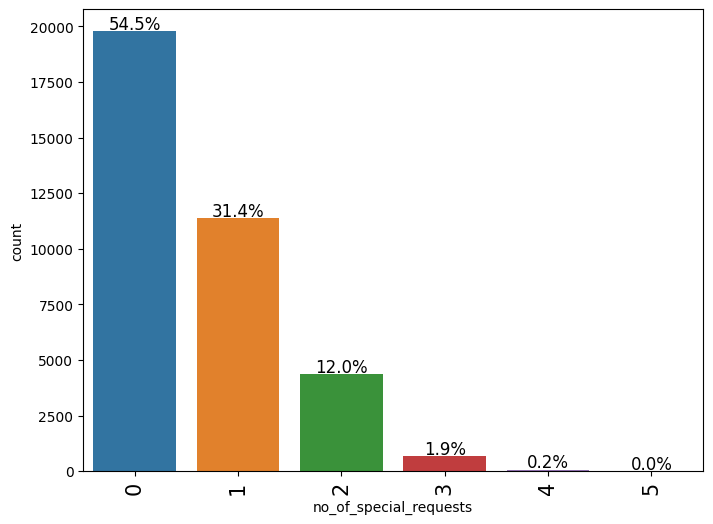

In [14]:
numeric_cols = data.select_dtypes(include='number').columns
hist_cols = ['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'lead_time', 'avg_price_per_room']

for col in numeric_cols:
    if col in hist_cols:
        histogram_boxplot(data, col)
    else:    
        labeled_countplot(data, col, perc=True)
    
    

_Observations on Numerical Univariate Analysis_
- 96% of all bookings do not have children while 72% have 2 adults.
- Slightly above 50% of bookings spend 1-2 weekend nights, 46% do not spend any weekend night at all while the rest spend more than 2 nights
- Almost 80% of all bookings spend 1, 2 or 3 nights during the week
- Almost half of the bookings donot have any special requests while a third have only 1 special request
- average price per room is almoost normally distributed with a mean of $100
- 97.4 % of all bookings are not repeated guests. of the 2.6% who are repeated guests, there is a significant number of previous bookings not cancelled ranging all the way up to 60.
- 82% of all bookings are for year 2018, with the 10th month being the busiest while every week day has almost uniform distribution of bookings
- 96.9% of all bookings do not require parking space


b. Univariate Analysis on Categorical Variables

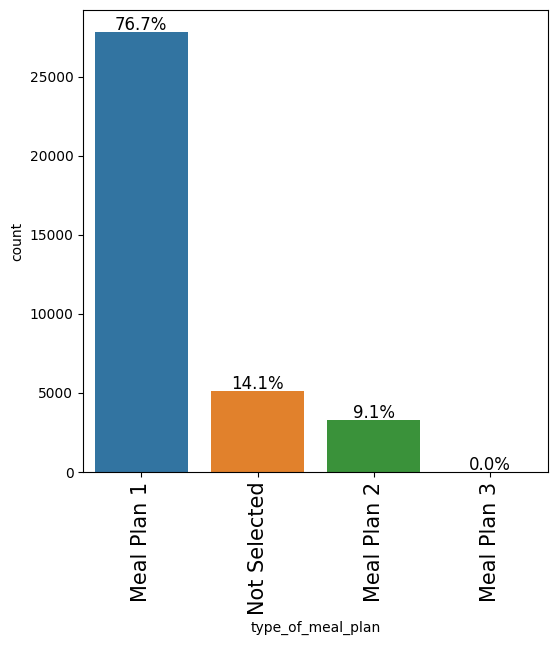

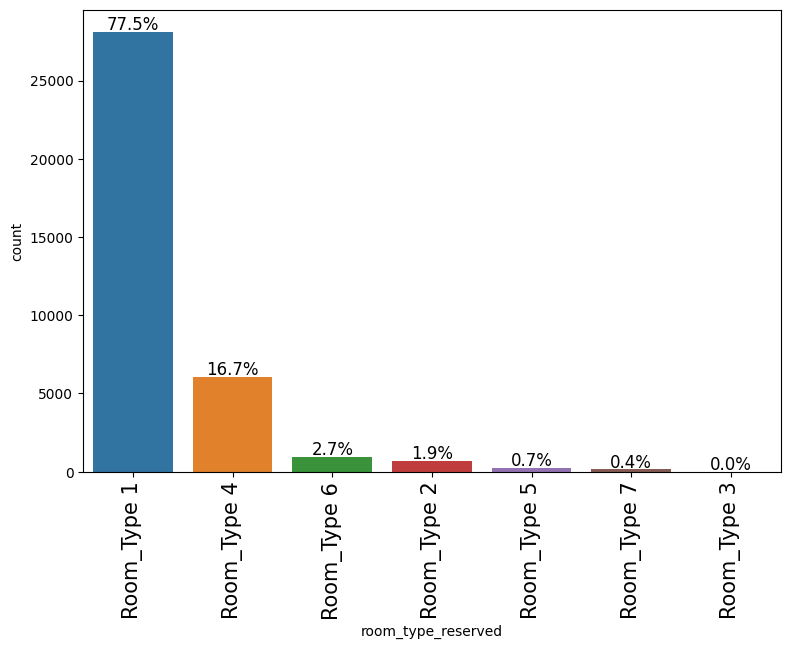

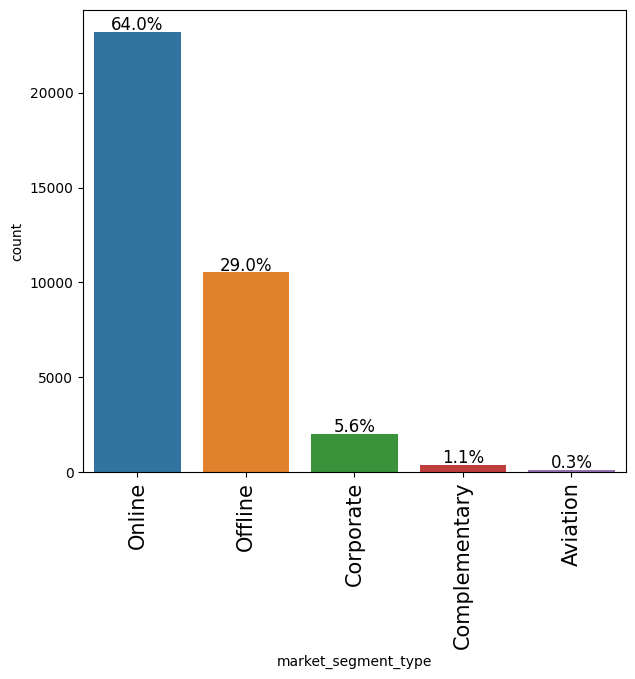

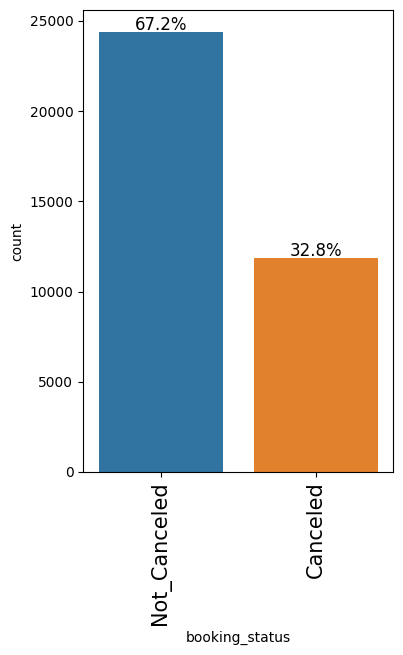

In [15]:
#bar plots of percentages of each categorical feature
object_cols = data.select_dtypes(include='object').columns

for  col in object_cols:
    labeled_countplot(data, col, True)

_Observation on Catogorical Univariate Analysis_


- 62.7 % of all bookings are not cancelled. There is no class imbalance on the target variable
- Online bookings constitute most of the bookings taking 64%
- Room type 1 is the most popular taking mora then 75% of all bookings while room type 3 is the least popular
- Meal plan 1 is the most demanded with 76.7% of all bookings while meal plan 3 is least popular with almost 0% of bookings

### Bivariate Analysis

Helper functions for visualisation

In [16]:
### function to plot distributions wrt booking status

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of "+ target + ": " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of "+ target + ": " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot of " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot of " +  target + " (without outliers)")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [17]:
# function to plot stacked bar plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

a. Bivariate Analysis of Booking_Status against other features

i. Analysis of Bookings by arrival month

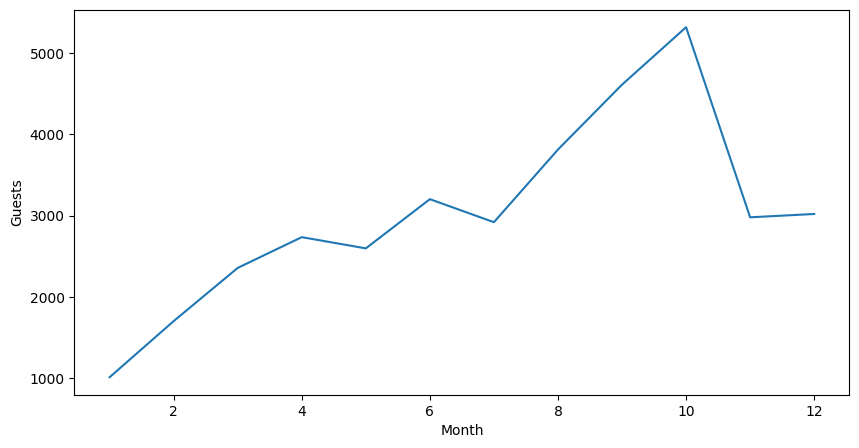

In [18]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

_Observation_: 
- The 10th month has the most bookings
- Bookings gradually increase from the 1st month up to the 10th month before dropping off

ii. Analysis of cancellations by lead time and arrival month

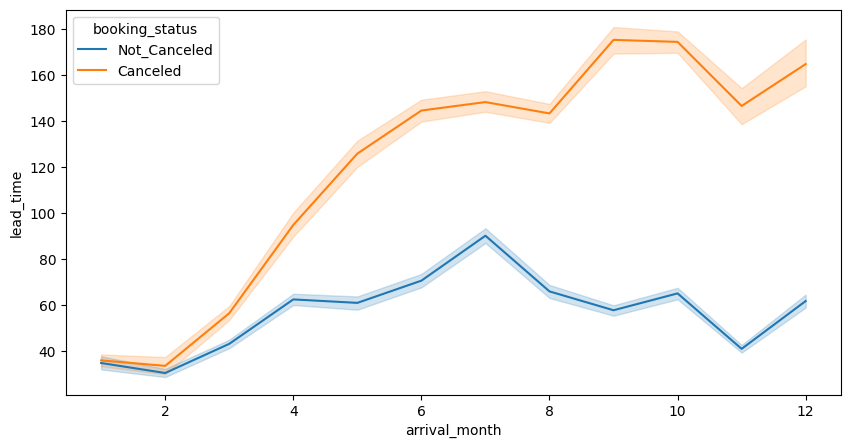

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="arrival_month", y="lead_time", hue="booking_status")
plt.show()

_Observation_: 
- Cancelled bookings have higher lead time 
- The 9th and 10th month have the highest lead times

iii. Analysis of cancellations by arrival month

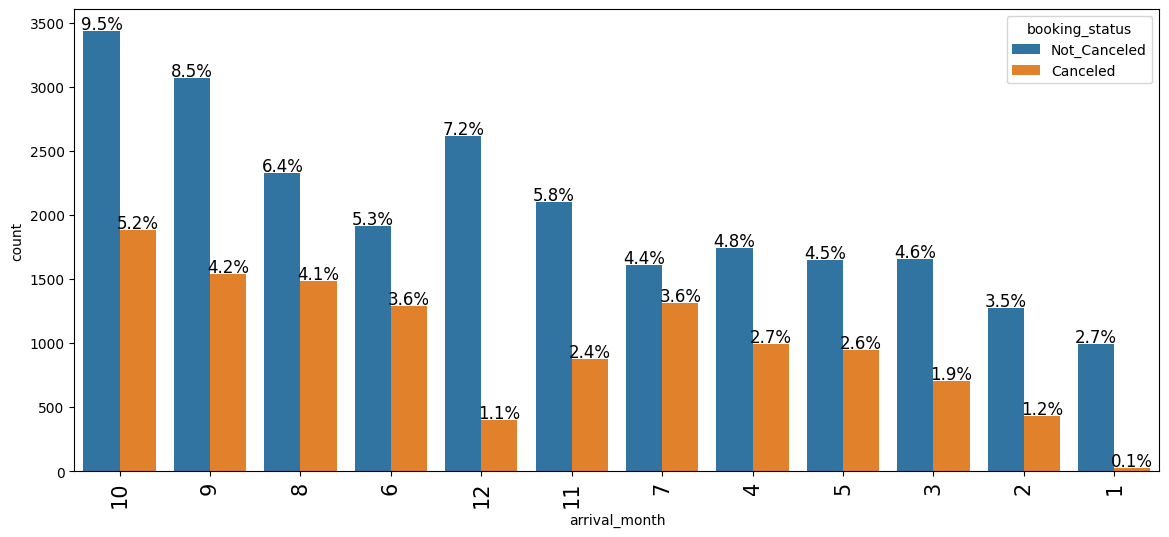

In [20]:
labeled_countplot(data, "arrival_month", perc=True, hue="booking_status")

_Observation_ 
- Cancellations by arrival month are consistent with the average cancellations for all bookings which is approx 30% except for monrth 12 and 1 
- Month 12 and 1 have the least cancellations of 1.1% and 0.1% respectively

iv. Analysis of cancellations by Number of special reuqests

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


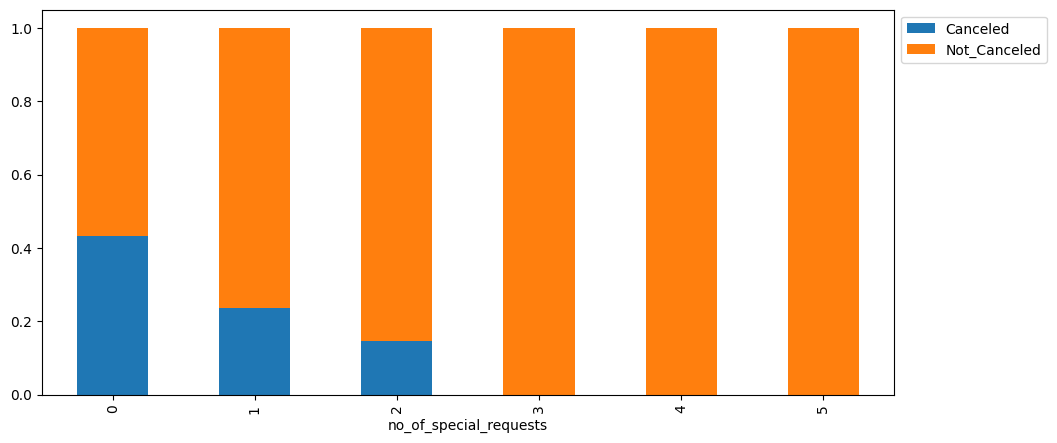

In [21]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

_Observation_: 
-  Bookings with special requests above 2 do not have any cancelllations. 
- Bookings with no special requests have highest number of cancellations slighlty above 40%

v. Analysis of cancellations by Market segment type

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


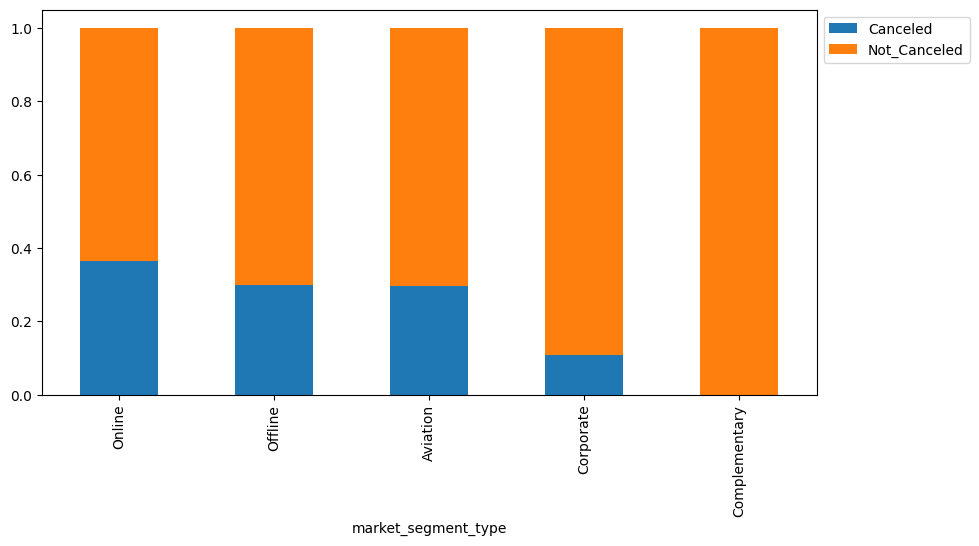

In [22]:
stacked_barplot(data, "market_segment_type", "booking_status")

_Observation_
- Online bookings have the highest number of cancellations almost 40% of online bookings
- Offline and Aviation bookings have same number of cancellations which is about a third of the respective bookings
- Complementary bookings hardly have any cancellations

vi. Analysis of cancellations by room type reserved

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


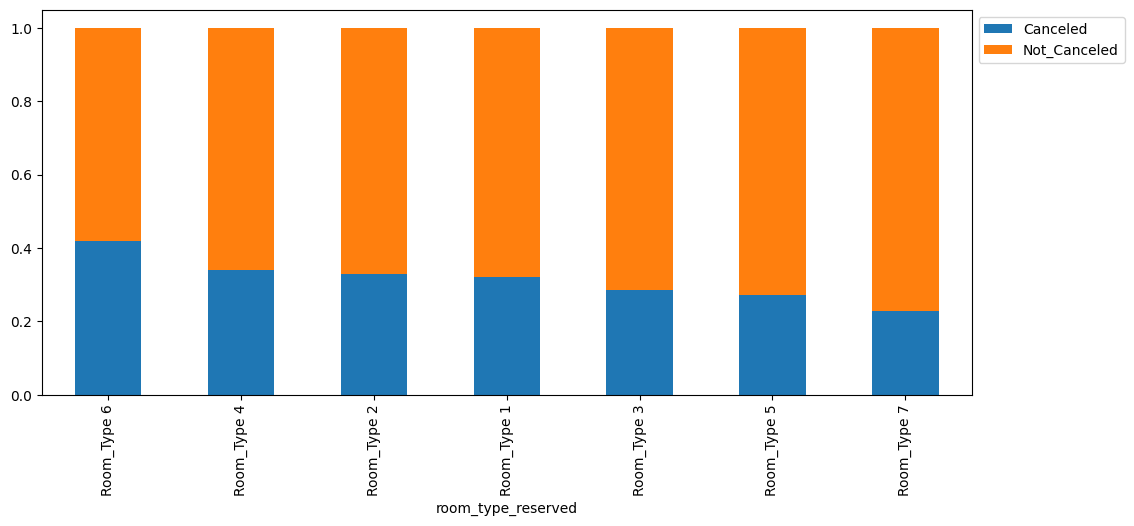

In [23]:
stacked_barplot(data, "room_type_reserved", "booking_status")


_Observation_
- Room type 6 has the highest % of cancellations at above 40% of all bookings for that room.
- Other rooms are within the average cancellations of apprx 30%

vii. Analysis of cancellations by repeating guest

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


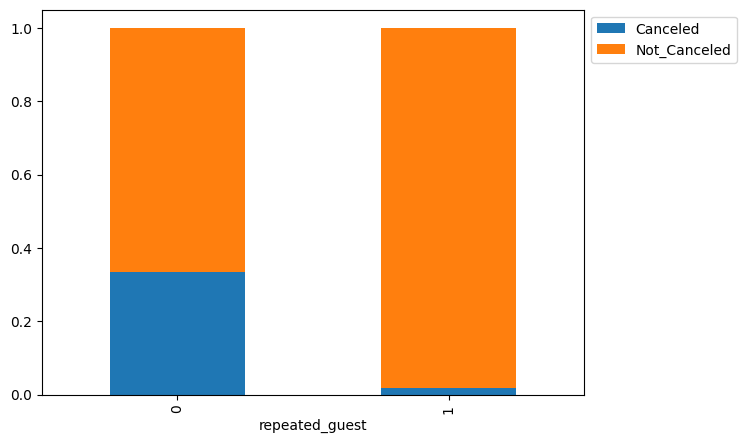

In [24]:
# visualising by stacked bar plot
stacked_barplot(data, "repeated_guest", "booking_status")


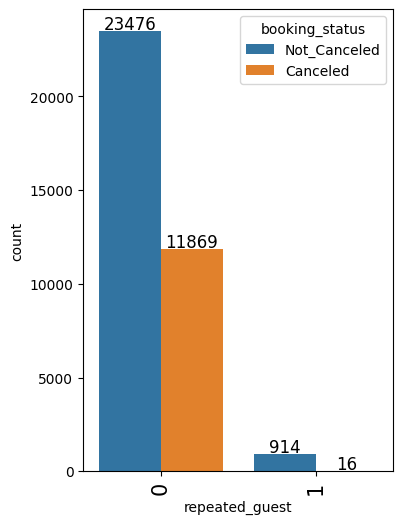

In [25]:
# visualising by labelled bar plot
labeled_countplot(data, "repeated_guest", hue="booking_status")


_Observation_: Repeated guests hardly cancel their bookings as evidenced by 16 out of 914 bookings having been cancelled

vii. Analysis of cancellations by average price per room

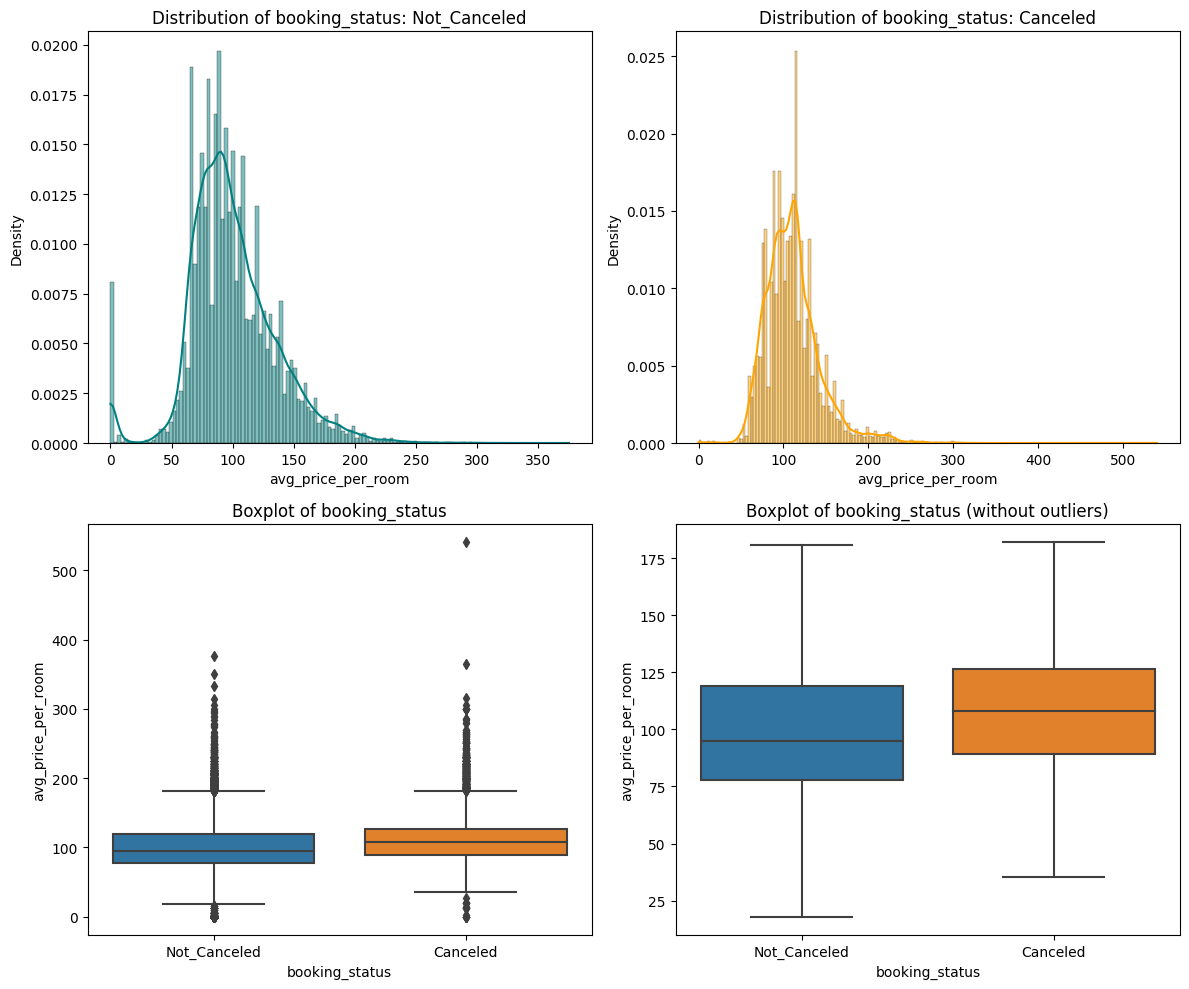

In [26]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

_Observation_ 
- Average prices per room have a similar distribution for both cancelled and not cancelled bookings
- On average, average price per room is high for cancelled bookings than it is for bookings not cancelled. 

b. Analysis of variation in average price per room by Market Segment type 

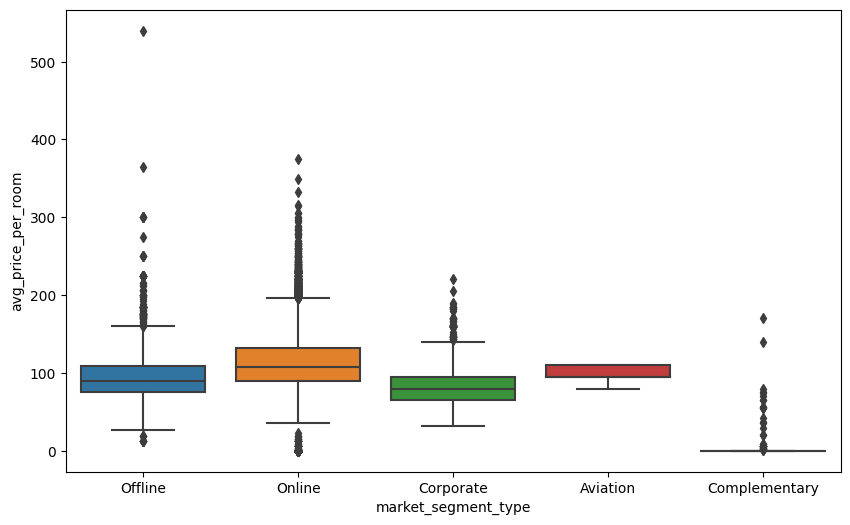

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

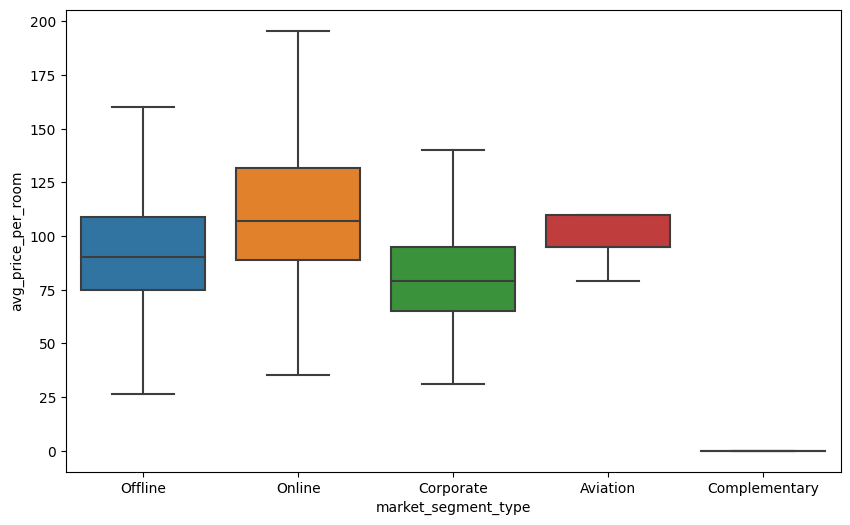

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", showfliers=False
)
plt.show()

_Observation_
- Online bookings are generally more expensive with the median slighlty above or equal to the other segment types' 75th quartile
- Aviation bookings have a small IQR of appr $30

c. Correlation check 


Encoding Canceled bookings to 1 and Not_Canceled as 0 for further analysis

In [29]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)


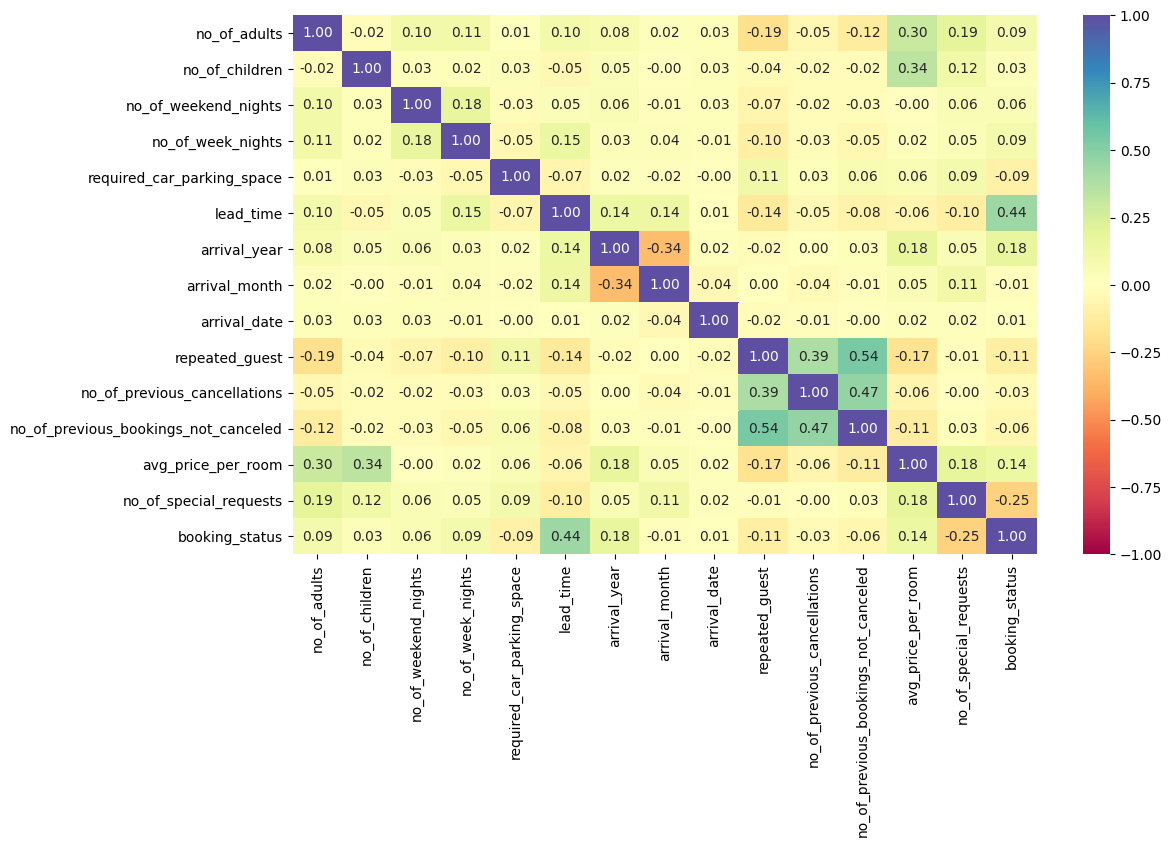

In [30]:
#plot for heatmap
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

_Observation_
- The target variable Booking Status does not have strong correlation with almost all features except lead time. 
- A moderately strong positive correlation can be observed on no_of_previous_bookings_not_cancelled with both repeated_guest and no_of_previous_cancellations
- Average price per room has a somewhat positive correlation  with both numberof adults and number of children

### _Observations on EDA with regards to the key questions_
- The busiest month in the hotel is the 10th month constituting above 5000bookings of the total 36275 bookings.Bookings in this and the 9th month have the highest lead times.  
- Most of the guests are coming from the online market segment constituting 64% of all bookings. Of these about 39% get cancelled
- For the different market segments, online bookings are generally more expensive with the median above the other segment types' 75th quartile
- A negligible % of the repeating guests cancel their bookings being only 14 out of 914 bookings
- Bookings with special requests are less likely to cancel. For the bookings with requests above 2, it has been observed that no cancellations were made and for bookings without any special requests almost 40% get cancelled.

## Data Preprocessing


a. Outlier detection and treatment

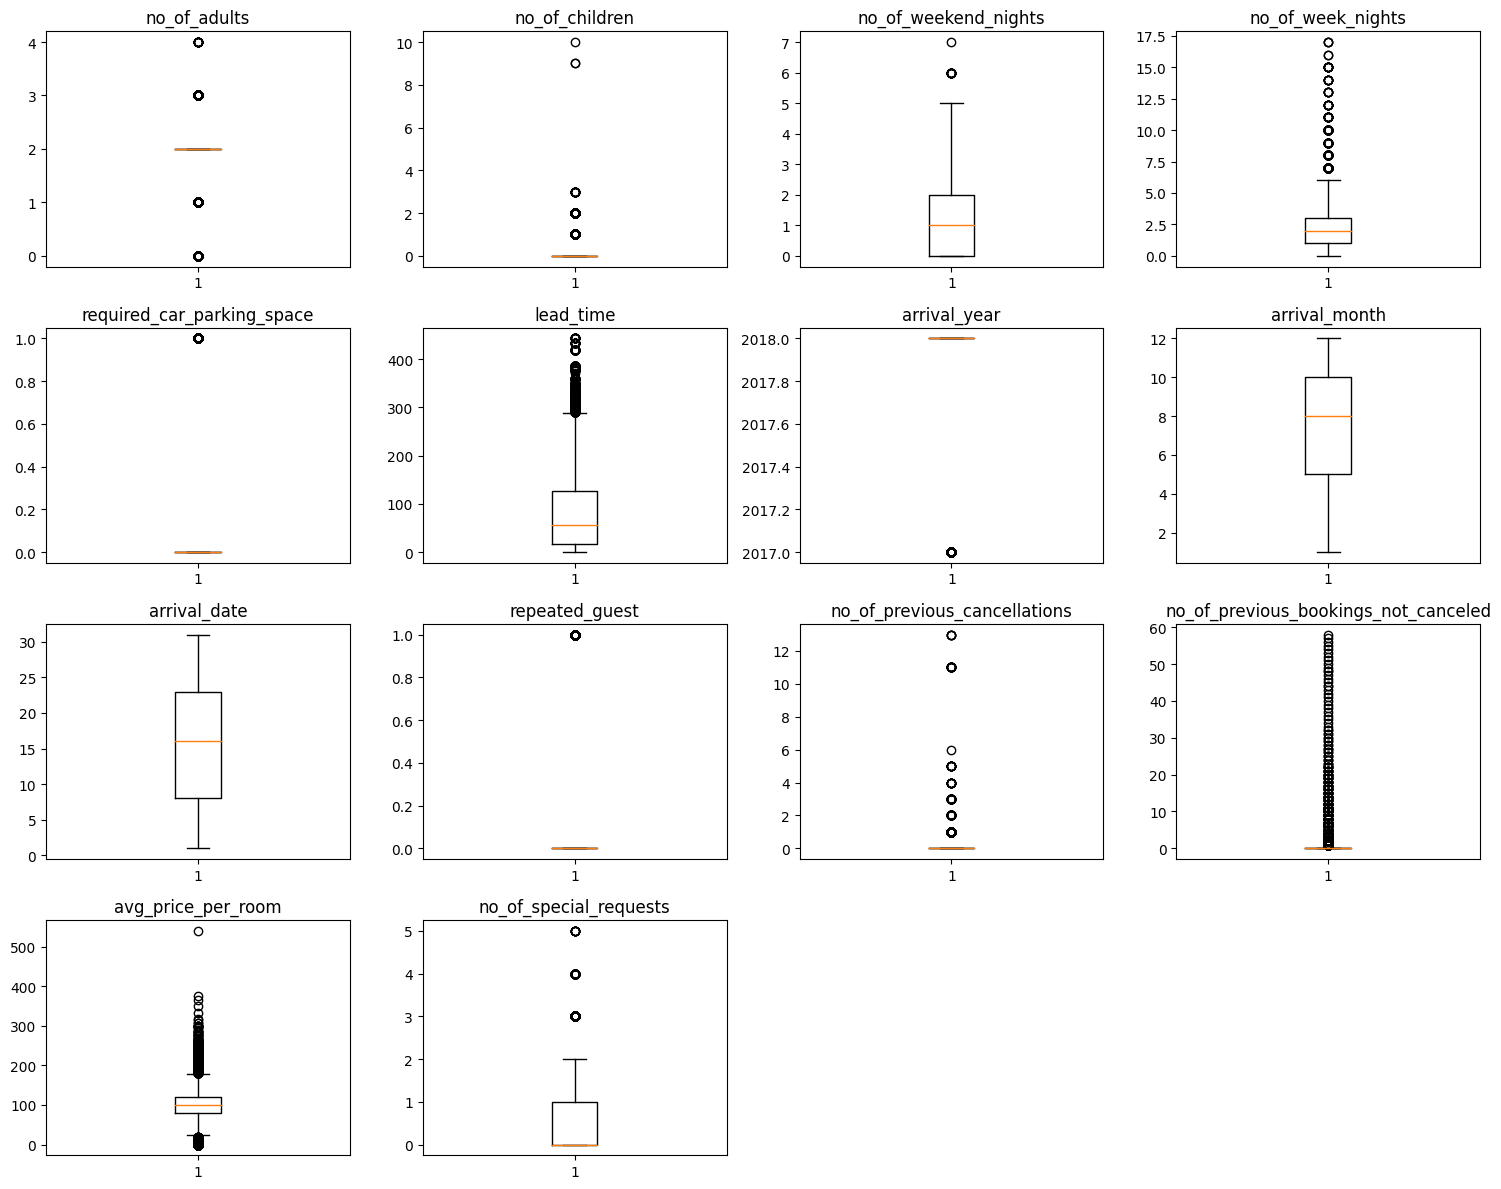

In [31]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers have been identified for the number of children and average price per room which need to be treated

i. Treating outliers for number of children

In [32]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

ii. Treating outliers for average price per room

In [33]:
#analysisng distribution of prices for $0 rooms
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

Most of the rooms are complimentary. This is alright so will not be treated

In [34]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)
  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

## EDA

- Exploring the data once again after manipulating it.

In [35]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10476,0.39466,0.00000,0.00000,0.00000,0.00000,3.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


_Observation_
- The unique key booking_id is no longer part of the data
- no_of_children now has maximum of 3
- average price per room has a maximum of 375
- booking status has been encoded with 0 and 1

## Model Building

#### Data Preparation for modeling (Logistic Regression)
- The goal is to predict which bookings will be canceled.
- Before proceeding to build a model, 
- 1. categorical features need to be encoded by creating dummy variables
- 2. the data needs to be split into train and test to be able to evaluate the model that has been build on the train data.

In [36]:
#data preparation
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = add_constant(X) 

X = pd.get_dummies(X, drop_first=True) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [174]:
# exploring the train and test sets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\nPercentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)

Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64

Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


Checking data values on train set

In [37]:
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.00000,1,0,0,1,0,163,2018,10,15,0,0,0,115.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26641,1.00000,2,0,0,3,0,113,2018,3,31,0,0,0,78.15000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
17835,1.00000,2,0,2,3,0,359,2018,10,14,0,0,0,78.00000,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21485,1.00000,2,0,0,3,0,136,2018,6,29,0,0,0,85.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5670,1.00000,2,0,1,2,0,21,2018,8,15,0,0,0,151.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1


_Observation:_ All values have been encoded well. The data is ready for model building

#### There is need for helper functions to calculate different metrics and confusion matrix for reuse on all models
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [39]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

In [40]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit() 
print(lg.summary()) 

         Current function value: 0.425090
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.3292
Time:                        02:10:17   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653

_Observations_
- Negative values of the coefficient show that the probability of a booking being cancelled decreases with the increase of the corresponding attribute value
- Positive values of the coefficient show that the probability of a booking being cancelled increases with the increase of the corresponding attribute value
- p-value of the attribute indicates whether the attribute is significant or not in predicting booking_status. At siginificance level of 0.05 (5%), any attribute with a p-value above 0.05 is considered insignificant

Checking performance on model before any adjustments

In [41]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


_Observation_: 
- F1 Score is at 68% which means the model is not underfitting 
- The variables used to build the model might contain multicollinearity, which affects p-values
- There is need to remove multicollinearity on order to get reliable coefficients and p-values

### Checking Multicollinearity

i. Checking VIFs

In [42]:
# function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [43]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


_Observation_
- All the core features have VIFs within the acceptable range.
- Only 3 dummy variables for market segment type have high VIF but will not be treated. 

ii. Dropping high P-Value variables

- predictor variables having a p-value greater than 0.05 will be dropped as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, variables will not be dropped at once.
- Instead, the following will be done:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.



A loop will be defined for repeating the above process for each variable

In [44]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


Defining new train and test set for X using new features

In [45]:
X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]
print("Shape of x_train1", X_train2.shape)
print("Shape of x_test1", X_train2.shape)

Shape of x_train1 (25392, 22)
Shape of x_test1 (25392, 22)


Training logistic regression on X_train2 and y_train

In [46]:
logit2 = sm.Logit(y_train, X_train2.astype(float)) 
lg2 = logit2.fit() 
print(lg2.summary()) 

Optimization terminated successfully.
         Current function value: 0.425731
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.3282
Time:                        02:10:53   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600    

_Observation_:
- All features left are significant for predicting booking status as their p-values are less than 0.05

Checking model performance after multicollinearity and dropping high p-value features

In [47]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2 ,y_train) ## Complete the code to check performance on X_train1 and y_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


_Observation_
- F1 score has dropped slightly from 0.683 to 0.682
- This can be improved further

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [48]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


_Coefficient Interpretations_
- no_of_adults: holding all other features constant, a unit change in number of adults will increase the odds of a booking being cancelled by 11.5%
- no_of_children: holding all other features constant, a unit change in number of children will increase the odds of a booking being cancelled by 16.5%
- holding all other features constant, a unit change in required car parking space will drastically decrease the odds of a booking being cancelled by 79.7%.
- The odds of a corporate booking being cancelled is 54% less than that of an online booking. Also the odds of an offline booking being cancelled is less than that of an online booking by 83%

## Model performance evaluation

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### Checking model performance on the training set

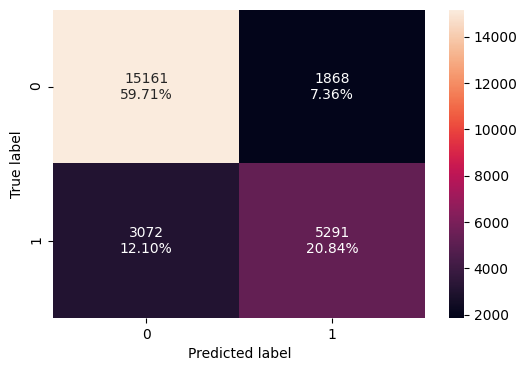

In [49]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [50]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


#### ROC-AUC
* ROC-AUC on training set

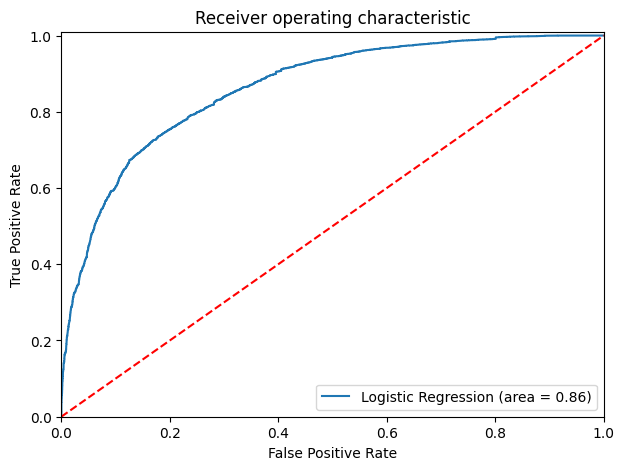

In [51]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

_Observation_:
Logistic Regression Model is giving good performance on training set at 86%

#### Model Performance Improvement

* Let's see if the F1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [52]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37005225587080126


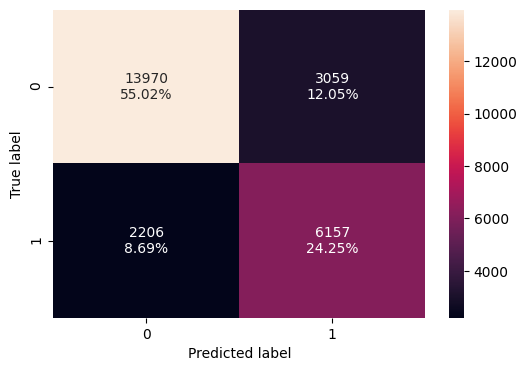

In [53]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train,threshold=optimal_threshold_auc_roc
) 

In [54]:
# checking model performance for this model: lg2
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


_Observation_
- F1 Score has improved from 0.682 to 0.700 on optimal threshold by AUC ROC
- Model performance has improved for all metrics

#### Using Precision-Recall curve and to find a better threshold and possibly improve model performance further

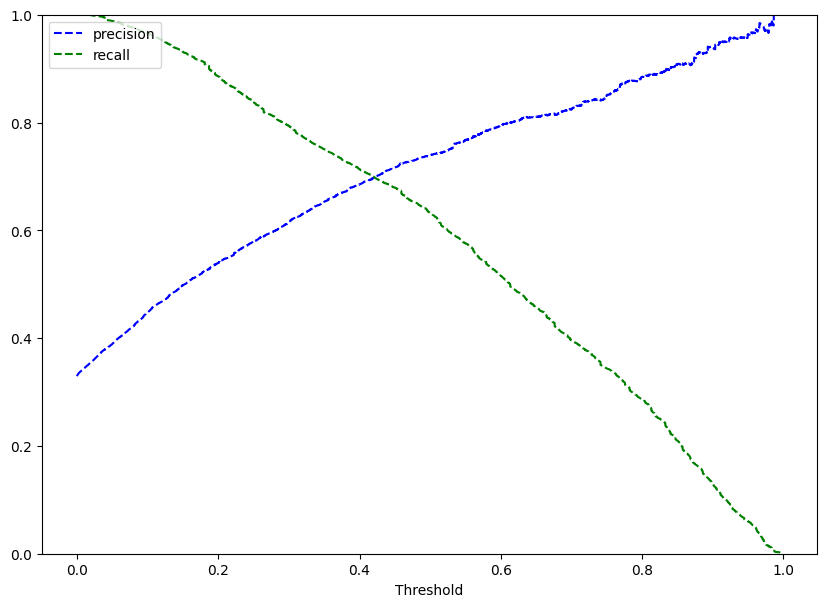

In [55]:
# visualising precision recall Curve
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [56]:
# setting the threshold
optimal_threshold_curve = 0.42

_Observation_
- At the threshold of 0.42, we get the perfect balance between Recall and Precision

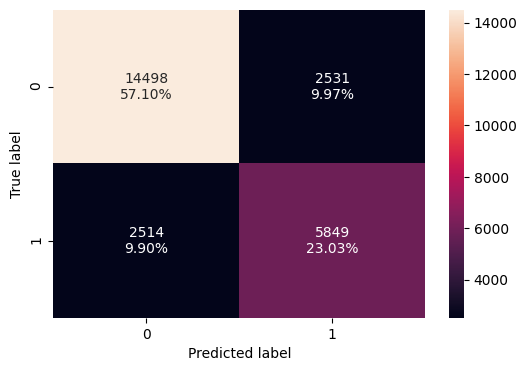

In [57]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2,y_train, threshold=optimal_threshold_curve
)

In [58]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


_Observation_
- F1 Score has improved from 0.681 (at default threshold) to 0.699
- Model performance is still good on the training set

#### Checking the performance on the test set

**1. Using model with default threshold**

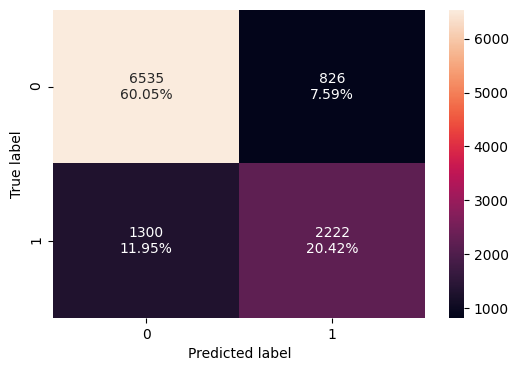

In [59]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2,y_test)

In [60]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg2, X_test2,y_test) 

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


_Observation_
- On the default threshold, F1 Score is 0.677 on the test set
- On recall the model is not performing well as it is performing below 0.65

**2. Using model with ROC curve optimal threshold on test set**

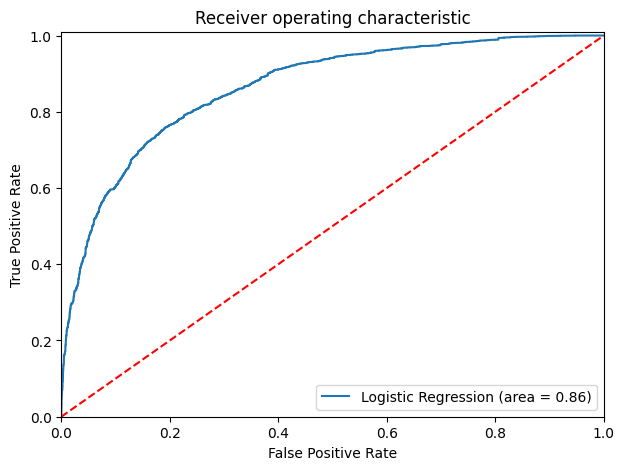

In [61]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

_Observation_:
- Model performance is very good at 86% on the test set

**Using model with threshold=optimal_threshold_auc_roc=0.37**

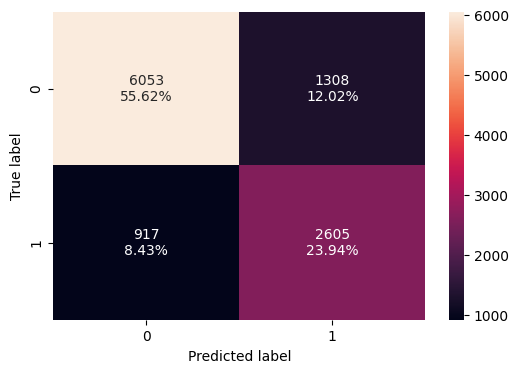

In [62]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc) 

In [63]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


_Observation_
- F1 Score has increased from 0.68 to 0.70 using AUC ROC
- Generally the model is performing well

**3. Using model with Precision Recall threshold on test set**
- optimal_threshold_curve = 0.42

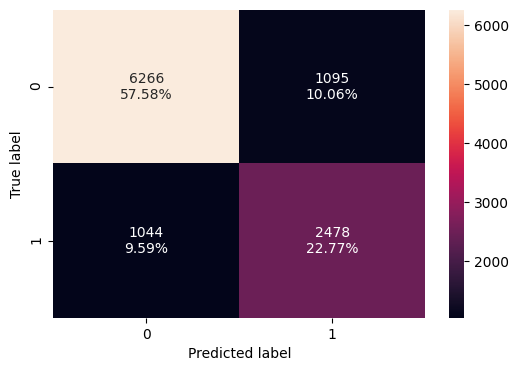

In [64]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve) 

In [65]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


_Observation_
- F1 Score has increased slightly from 0.682 (on default threshold) to 0.699
- General model performance has improved on all metrics

#### Model performance summary

In [66]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [67]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("test performance comparison:")
models_test_comp_df

test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


_Observation_
- Almost all models are performing well on both training and testing set without the problem of overfitting
- The model with the default threshold 0.37 is giving the best performance and therefore will be chosen as the final model

## Final Model Summary

- A predictive model that can find bookings that are likely to be cancelled has been built with a F1 score of 0.70 on both test and training set
- all the logistic models have given a generalised performance on the training and test set
- coefficients of 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year','no_of_previous_cancellations', 'avg_price_per_room' are positive. Increase in these will lead in increase in chances of booking being cancelled
- coefficients of 'required_car_parking_space',  'arrival_month', 'repeated_guest', 'no_of_special_requests' are negative. Increase in these will lead in decrease in chances of booking being cancelled

## Building a Decision Tree model

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [68]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1) 

In [69]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\nPercentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)

Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64

Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### Helper functions will be defined for calculating different metrics and confusion matrix for reuse 
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [70]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [71]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree Model

In [72]:

model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

_Observation_
- A decision tree model has been built with hyper parameter random state = 1

## Do we need to prune the tree?

#### 1. Checking model performance on training set

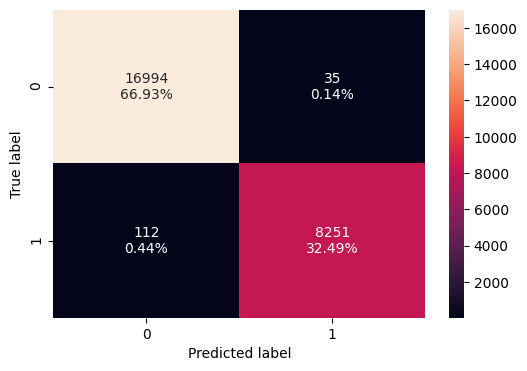

In [73]:
confusion_matrix_sklearn(model, X_train, y_train) 

In [74]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


_Observation_: The model seems to be performing perfectly well on the training using all performance metrics with F1 Score at 99.1%

#### 1. Checking model performance on test set

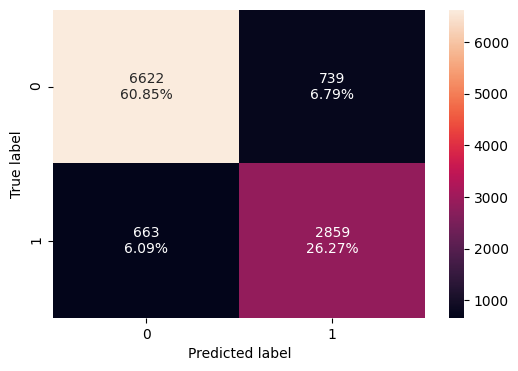

In [75]:
confusion_matrix_sklearn(model, X_test, y_test) 

In [76]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) 
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


_Observation_ 
- F1 Score on test set is 80.3%
- There is a significantly large difference between F1 Score for training set and F1 Score for test set
- This implys overfitting on the model
- It needs pruning

**Checking the important features before pruning.**

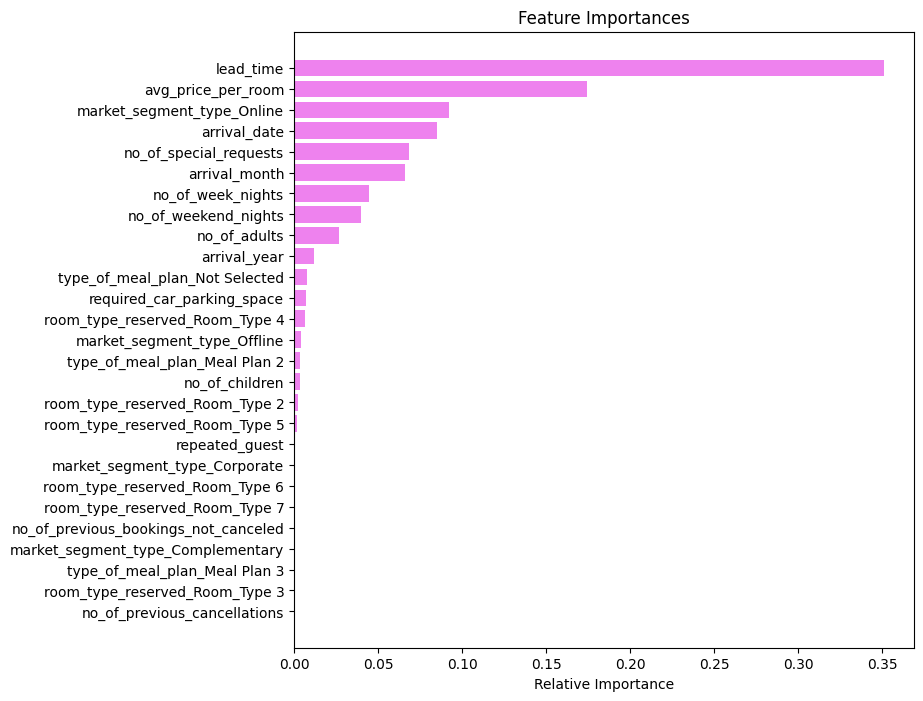

In [77]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

_Observation_
- Lead time, average price per room, market segment type online and arrival date stand out as the most important features

#### Pruning the tree

**1. Pre-Pruning**

In [78]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

_Observation_
- The best estimator has class_weight balanced, max_depth of 6 , 50 maximum leaf nodes and random state set to 1

#### a. Checking performance of pre-pruned model on training set

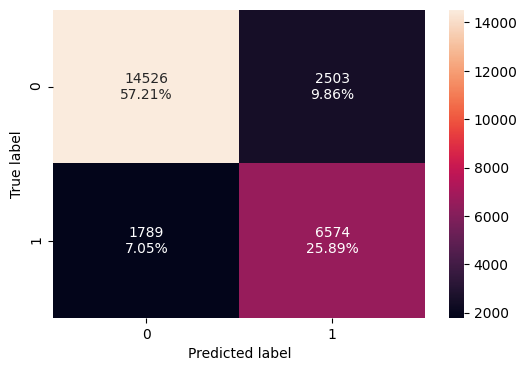

In [79]:
confusion_matrix_sklearn(estimator, X_train, y_train) 

In [80]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


_Observation_
- All performance metrics have reduced with F1 Score now at 75.4% from 99.1%
- However the model is performing well

#### b. Checking performance of pre-pruned tree on test set

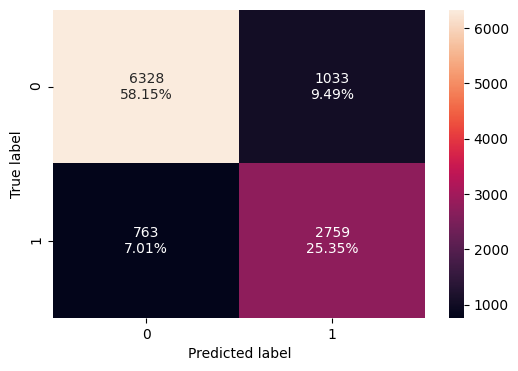

In [81]:
confusion_matrix_sklearn(estimator, X_test, y_test) 

In [82]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) 
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


_Observation_
- F1 Score is good at 75.44%
- This is almost similar to the F1 Score on training set of 75.39%
- This implys the pre-pruned model is generalising well

#### Visualizing the Decision Tree

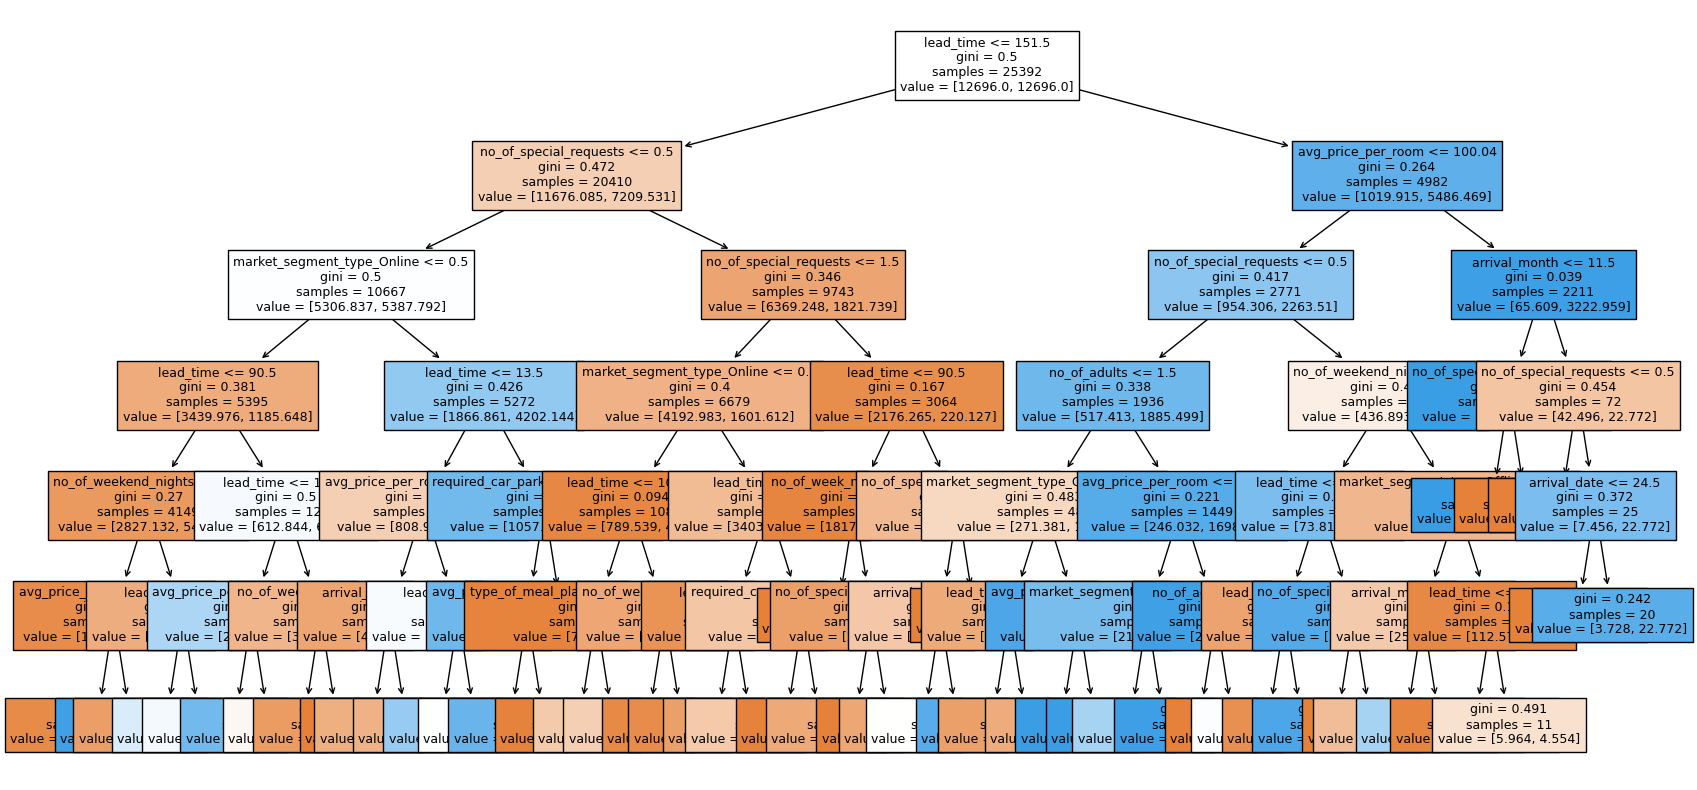

In [83]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [84]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

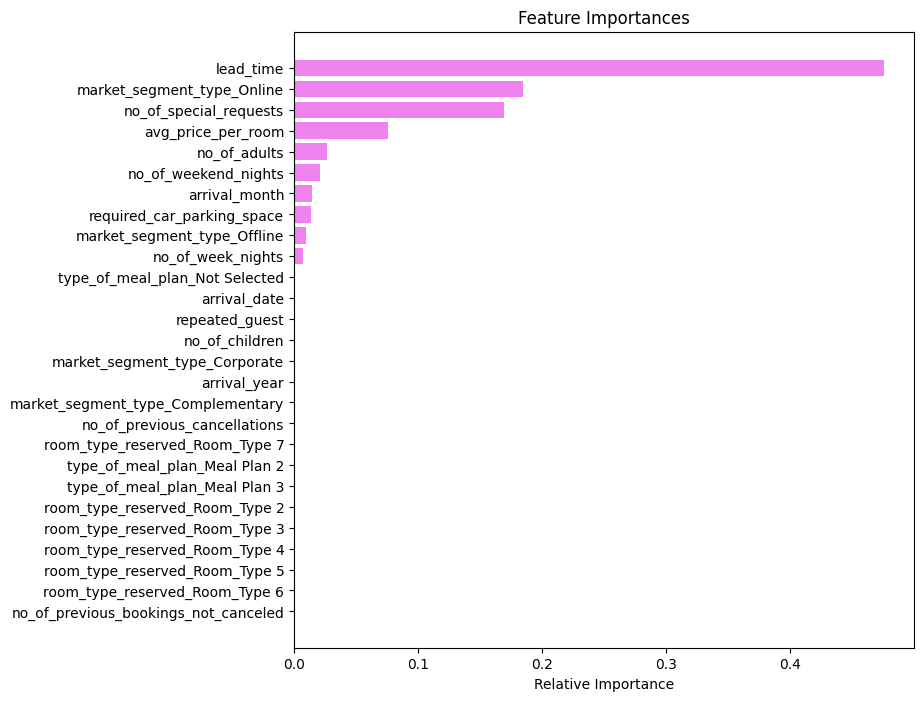

In [85]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

_Observation_
- Lead time, average price per room, market segment type online and number of special requests are now the most important in tree building

**2. Cost Complexity Pruning**

In [86]:
#setting parameters
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [87]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


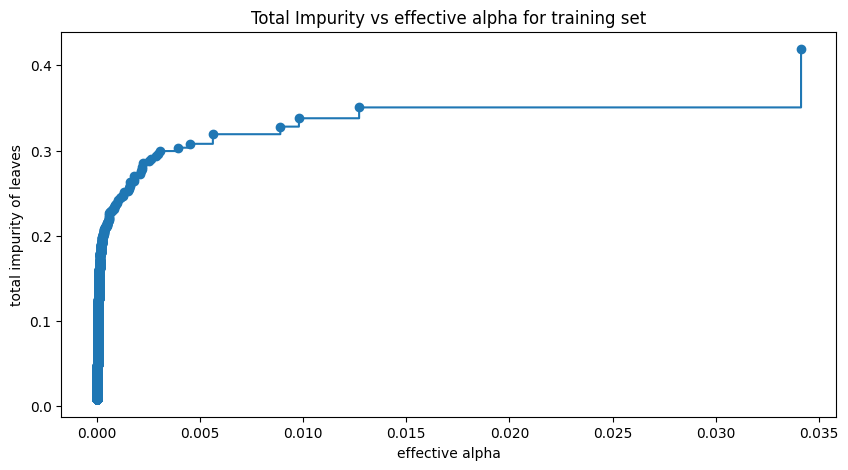

In [88]:
# plotting Total Impurity vs effective alpha for training se
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

_Observation_
- Total impurities became constant at effective alpha 0.012

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [89]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


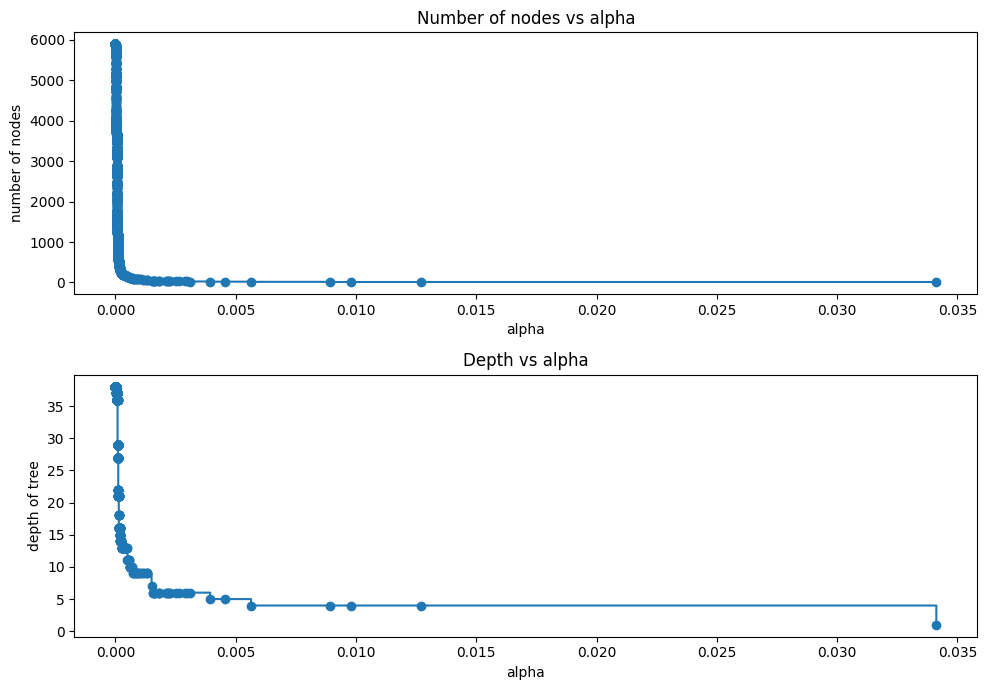

In [90]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [91]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

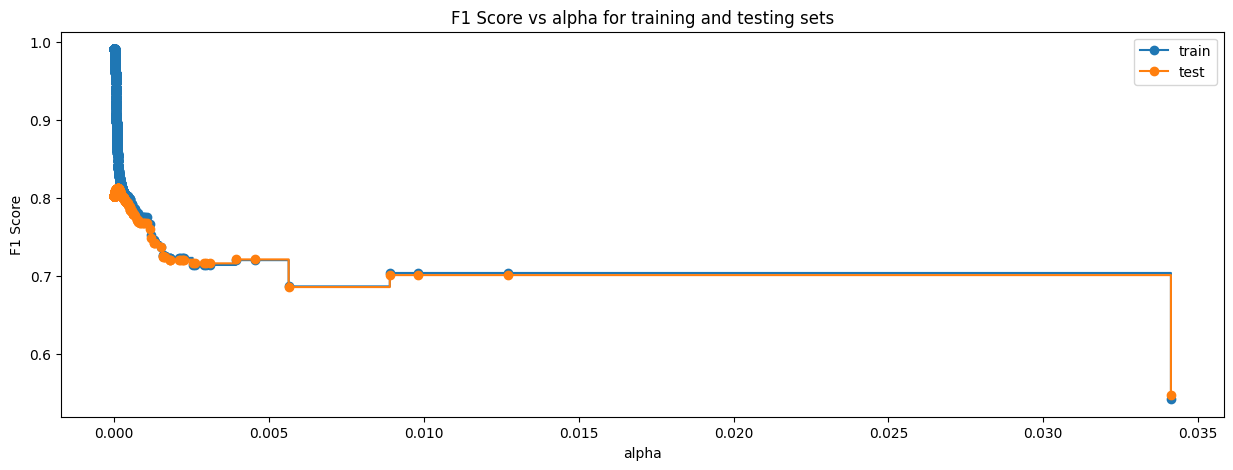

In [92]:
# visualising F1 Score vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

_Observation_
- F1 Score decreased as alpha increased. This is as expected

In [93]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00011676062470523539, random_state=1)


#### Checking performance on training set

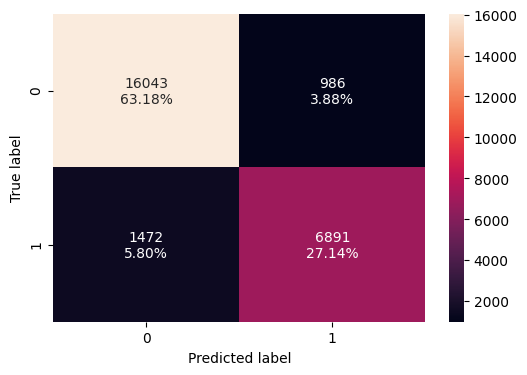

In [94]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [95]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90320,0.82399,0.87483,0.84865


_Observation_
- Performance has reduced but is still very good implying the model is not underfitting
- F1 Score is at 84.87%

#### Checking performance on test set

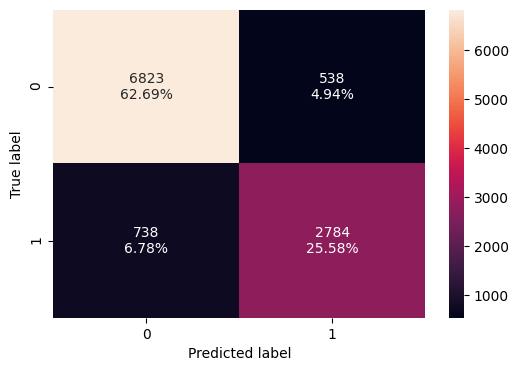

In [96]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [97]:

decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.88275,0.79046,0.83805,0.81356


_Observation_
- Performance on the test set is good.
- F1 Score is only 0.03 % less than on the training set implying the model is generalising well on unseen data

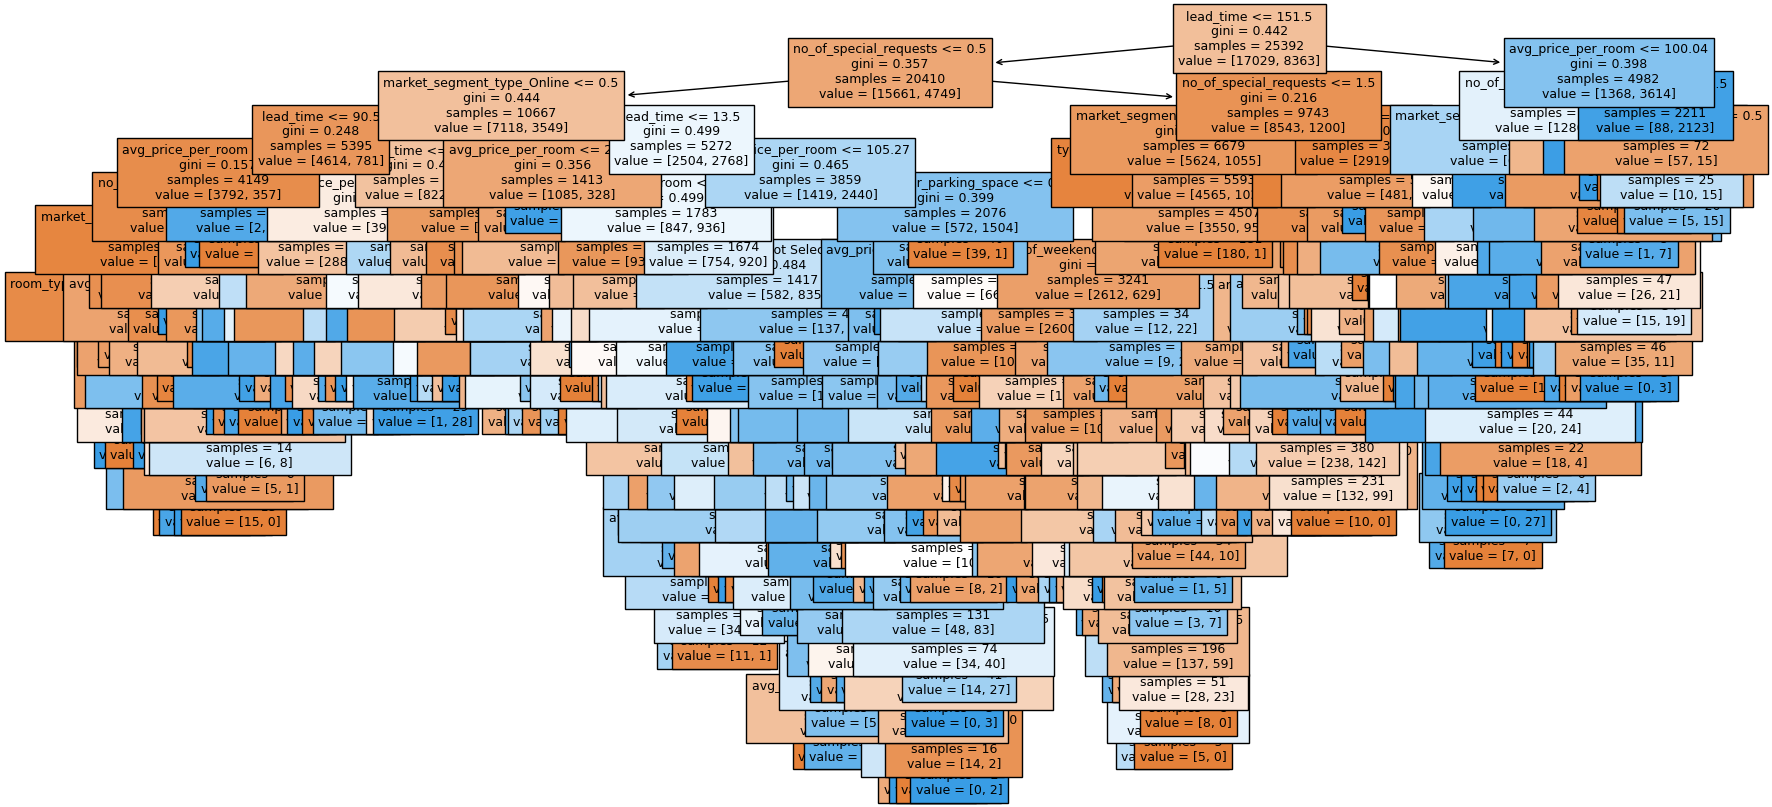

In [98]:
# Visualising the tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

_Observation_
- The tree still appears to be overgrown and hard to read

In [99]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [509.00, 30.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [42.00, 5.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- arrival_d

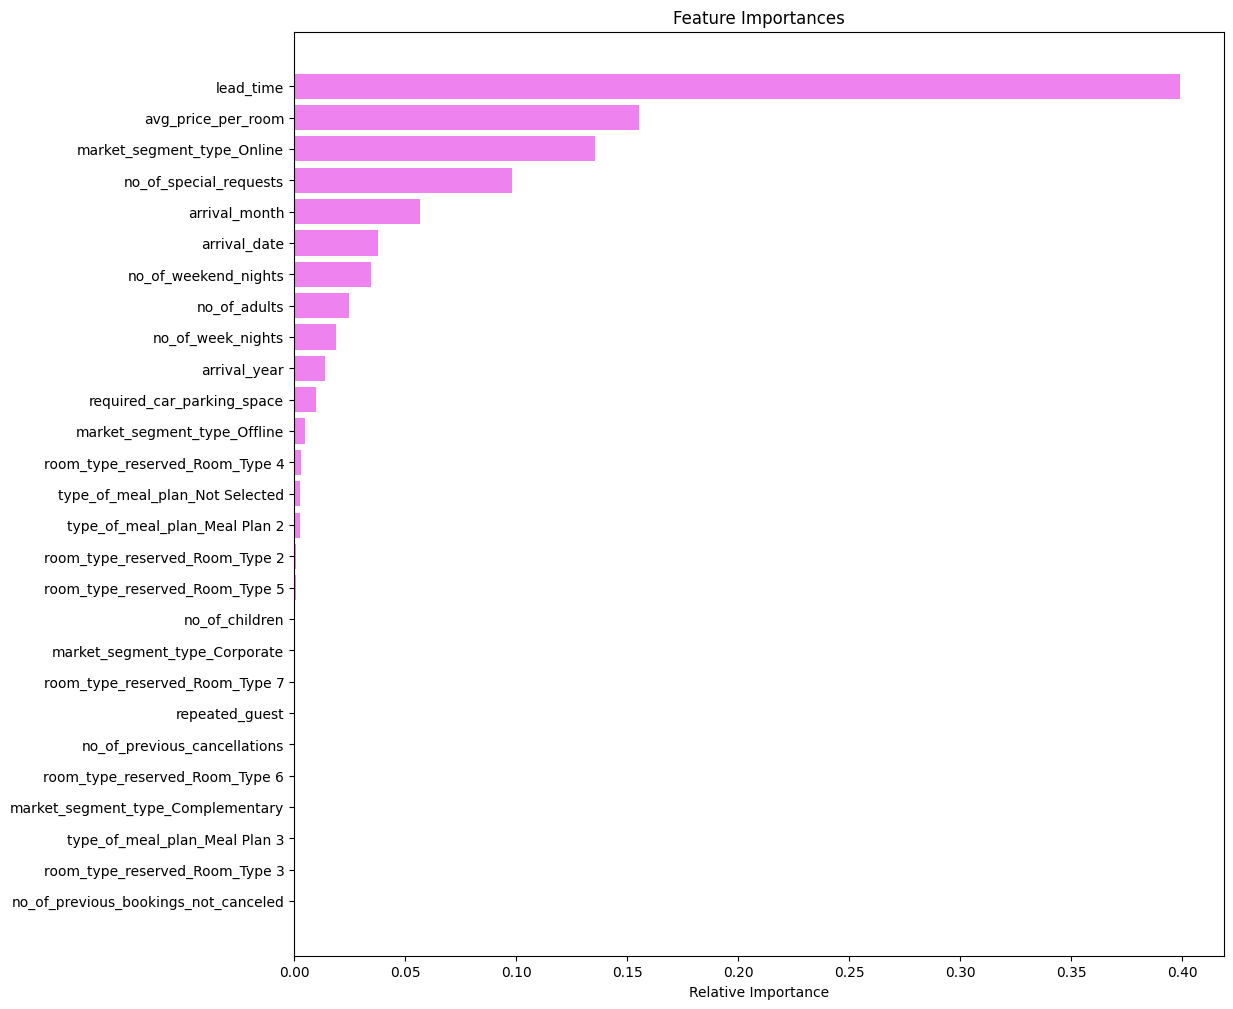

In [100]:
#visualising the feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

_Observation_
- Lead time, average price per room, market segment type online and number of special requests are now the most important in tree building

## Model Performance Comparison and Conclusions

#### Comparing Decision Tree models

In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.90320
Recall,0.98661,0.78608,0.82399
Precision,0.99578,0.72425,0.87483
F1,0.99117,0.75390,0.84865


In [102]:
# testing performance comparison


models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.88275
Recall,0.81175,0.78336,0.79046
Precision,0.79461,0.72758,0.83805
F1,0.80309,0.75444,0.81356


_Observation_
- The pruned trees are performing well on both training and test data without overfitting
- The post pruning model is the best model giving the best F1 Score of 0.81. Therefore it is selected as final model

# Decision Tree Conclusion
- The model built can predict if a booking will be cancelled or not and can correctly identify 81% of all cancellations
- Lead time, average price per room and online market segment type are the most important in determining booking_status for a booking.


## Actionable Insights and Recommendations

- Profitable policies for cancellations and refunds the hotel adopt
    - Implement a tiered cancellation policy based on the lead time. for instance if the cancellation is made within the shorter window, consider a partial refund or a credit towards a future stay.
    - Offer more lenient cancellation policies or additional benefits for repeat guests, such as a longer cancellation window or a higher refund percentage.This can incentivize repeat business and build customer loyalty
    - Implement a slightly stricter cancellation policy for online bookings compared to direct bookings (e.g., a shorter cancellation window or a higher cancellation fee).
- Other recommendations
    - The hotel can limit the lead time for bookings to increase turnover 
    - Market research for non repeat customers and look into their specific needs in order to encourage repeat visits
    - offer child friendly facilities such as playgrounds, amusement parks to encourage family visits